# Wikipedia Notable Life Expectancies

# [Notebook 5 of : Data Cleaning](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_clean4_thanak_2022_06_23.ipynb)

## Context

The


## Objective

The

### Data Dictionary

- Feature: Description

## Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np
import re

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 200)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some visualization attributes
pd.set_option("max_colwidth", 150)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### Reading, Sampling, and Checking Data Shape

In [2]:
# Reading the dataset
conn = sql.connect("wp_life_expect_clean3.db")
data = pd.read_sql("SELECT * FROM wp_life_expect_clean3", conn)

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 132652 rows and 24 columns.


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
0,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21,1994,January,None,None,dancer,ballet designer and director,None,None,None,None,None,None,None,None,86.0,None,United Kingdom of Great Britain and Northern Ireland,None,None
1,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12,1994,January,None,None,economist,writer,and academic,None,None,None,None,None,None,None,68.0,None,Ireland,None,None


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
132650,9,Oleg Moliboga,", 69, Russian volleyball player, Olympic champion and coach.",https://en.wikipedia.org/wiki/Oleg_Moliboga,2,2022,June,,None,volleyball player,Olympic champion and coach,None,None,None,None,None,None,None,None,69.0,None,Russia,None,1980
132651,9,Zou Jing,", 86, Chinese engineer, member of the Chinese Academy of Engineering.",https://en.wikipedia.org/wiki/Zou_Jing_(engineer),3,2022,June,None,None,engineer,member of the Academy of Engineering,None,None,None,None,None,None,None,None,86.0,None,"China, People's Republic of",None,None


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
63013,31,Earl Barbry,", 62, American Tunica-Biloxi tribal leader, Chairman , cancer.",https://en.wikipedia.org/wiki/Earl_Barbry,2,2013,July,since,None,Tunica Biloxi tribal leader,Chairman,cancer,None,None,None,None,None,None,None,62.0,None,United States of America,None,since 1978
113324,12,Miryana Basheva,", 73, Bulgarian poet.",https://en.wikipedia.org/wiki/Miryana_Basheva,3,2020,July,None,None,poet,None,None,None,None,None,None,None,None,None,73.0,None,Bulgaria,None,None
17833,27,Charlie Applewhite,", 68, American singer and radio host.",https://en.wikipedia.org/wiki/Charlie_Applewhite,27,2001,April,None,None,singer and radio host,None,None,None,None,None,None,None,None,None,68.0,None,United States of America,None,None
68056,26,David Langner,", 62, American football player , cancer.",https://en.wikipedia.org/wiki/David_Langner,3,2014,April,"Auburn Tigers, key player in ""Punt Bama Punt"" Iron Bowl",None,football player,cancer,None,None,None,None,None,None,None,None,62.0,None,United States of America,None,"Auburn Tigers, key player in ""Punt Bama Punt"" 1972 Iron Bowl"
114706,1,Moose Lallo,", 95, Canadian ice hockey player .",https://en.wikipedia.org/wiki/Moose_Lallo,34,2020,September,"Muskegon Zephyrs, Grand Rapids Rockets, Washington Presidents",None,ice hockey player,None,None,None,None,None,None,None,None,None,95.0,None,Canada,None,"Muskegon Zephyrs, Grand Rapids Rockets, Washington Presidents"


<IPython.core.display.Javascript object>

### Checking Data Types, Duplicates, and Null Values

#### Observations:
- Due to the diversity of entries for `known_for`, we may need to prioritize entries for the extraction of this feature.
- To do so, we will proceed with typecasting num_references as integer, so we can determine which entries have more references.
- We will also make a copy of the `info_parenth` column, as we will alter that column and the information it contains is no longer present in the original `info` column.

#### Typecasting `num_references` as Integer

In [5]:
# Typecasting num_references as int64
df.loc[:, "num_references"] = df.loc[:, "num_references"].astype("int64")

<IPython.core.display.Javascript object>

### `num_references`

In [6]:
df["num_references"].describe()

count    132652.000000
mean          9.790406
std          19.436805
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max         837.000000
Name: num_references, dtype: float64

<IPython.core.display.Javascript object>

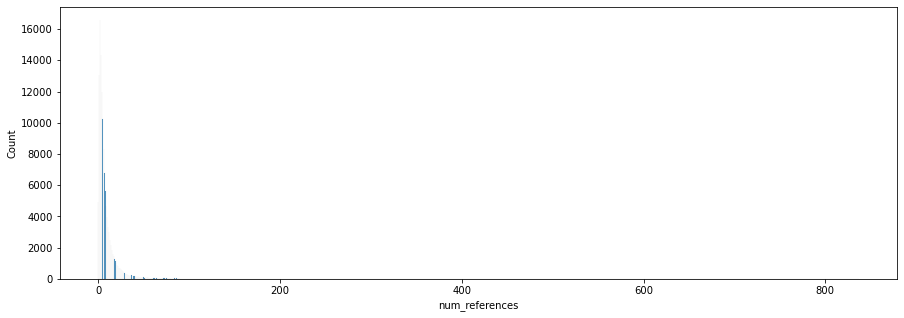

<IPython.core.display.Javascript object>

In [7]:
# Histplot of num_references
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="num_references")
plt.show()

#### Observations:
- The distribution of `num_references` is highly right skewed.
- We will verify some verifying of links to make sure the pages are for individuals.

In [8]:
# Example of verifying links (repeated in groups of 100 until num_references <100)
df.sort_values(by="num_references", ascending=False)[:10]

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
36579,19,Bill Andress,", 83, American baseball umpire.",https://en.wikipedia.org/wiki/Bill_Andress,837,2008,May,None,None,baseball umpire,None,None,None,None,None,None,None,None,None,83.0,None,United States of America,None,None
11356,14,Frank Sinatra,", 82, American singer , heart attack.",https://en.wikipedia.org/wiki/Frank_Sinatra,660,1998,May,"""My Way"", ""That Life"" and actor Oscar, winner",None,singer,heart attack,None,None,None,None,None,None,None,None,82.0,None,United States of America,None,"""My Way"", ""That Life"" and actor Oscar, 1954 winner"
35265,17,Bobby Fischer,", 64, American chess grandmaster, world champion , kidney failure.",https://en.wikipedia.org/wiki/Bobby_Fischer,631,2008,January,,None,chess grandmaster,world champion,kidney failure,None,None,None,None,None,None,None,64.0,None,United States of America,None,1972 1975
26014,11,Keith Miller,", 84, Australian Test cricketer, Australian rules footballer, fighter pilot and journalist.",https://en.wikipedia.org/wiki/Keith_Miller,586,2004,October,None,None,Test cricketer,rules footballer,fighter pilot and journalist,None,None,None,None,None,None,None,84.0,None,Australia,Australia,None
35003,28,Benazir Bhutto,", 54, Pakistani opposition leader and former prime minister , assassinated.",https://en.wikipedia.org/wiki/Benazir_Bhutto,554,2007,December,",",None,opposition leader and former prime minister,assassinated,None,None,None,None,None,None,None,None,54.0,None,Pakistan,None,"1988 1990, 1993 1996"
85511,25,Fidel Castro,", 90, Cuban politician, Prime Minister .",https://en.wikipedia.org/wiki/Fidel_Castro,531,2016,November,", President",None,politician,Prime Minister,None,None,None,None,None,None,None,None,90.0,None,Cuba,None,"1959 1976, President 1976 2008"
60287,5,Hugo Chávez,", 58, Venezuelan politician and military officer, President , heart attack.",https://en.wikipedia.org/wiki/Hugo_Ch%C3%A1vez,529,2013,March,since,None,politician and military officer,President,heart attack,None,None,None,None,None,None,None,58.0,None,Venezuela,None,since 1999
97905,25,John McCain,", 81, American politician and Navy officer, member of the U.S. Senate , glioblastoma.",https://en.wikipedia.org/wiki/John_McCain,528,2018,August,since and House of Representatives,None,politician and Navy officer,member of the Senate,glioblastoma,None,None,None,None,None,None,None,81.0,None,United States of America,None,since 1987 and House of Representatives 1983 1987
51541,20,Muammar Gaddafi,", 69, Libyan leader , shooting.",https://en.wikipedia.org/wiki/Muammar_Gaddafi,519,2011,October,,None,leader,shooting,None,None,None,None,None,None,None,None,69.0,None,Libya,None,1969 2011
105520,6,Robert Mugabe,", 95, Zimbabwean revolutionary and politician, President , cancer.",https://en.wikipedia.org/wiki/Robert_Mugabe,519,2019,September,and Prime Minister,None,revolutionary and politician,President,cancer,None,None,None,None,None,None,None,95.0,None,Zimbabwe,None,1987 2017 and Prime Minister 1980 1987


<IPython.core.display.Javascript object>

#### Observations:
- Some links point to lists, such as the entry with the maximum `num_references` for Bill Andress.
- Also, there are several entries that point to a list of German World War II medal recipiants.
- We will make a list of these links and change their `num_references` values to 1.

In [9]:
# Creating list of links containing "German" with over 20 references
checklist = [
    index
    for index in df.index
    if "German" in df.loc[index, "info"] and df.loc[index, "num_references"] > 20
]
link_list = df.loc[checklist, "link"].tolist()

<IPython.core.display.Javascript object>

In [10]:
# # Code used to go verify links
# print(link_list.pop())

<IPython.core.display.Javascript object>

#### Changing `num_references` to 1 where Entry Link Points to a List Page

In [11]:
# List of links that point to pages with lists of individuals
link_is_list = [
    "https://en.wikipedia.org/wiki/Bill_Andress",
    "https://en.wikipedia.org/wiki/Joachim_Boosfeld",
    "https://en.wikipedia.org/wiki/Alfred_Eick",
    "https://en.wikipedia.org/wiki/Gerhard_Fischer_(soldier)",
    "https://en.wikipedia.org/wiki/Arthur_B%C3%BCssecke",
    "https://en.wikipedia.org/wiki/Hans-G%C3%BCnther_Lange",
    "https://en.wikipedia.org/wiki/Waldemar_von_Gazen",
    "https://en.wikipedia.org/wiki/Heinz_Angelmaier",
    "https://en.wikipedia.org/wiki/Herbert_Fries",
    "https://en.wikipedia.org/wiki/Friedrich_Carl_(officer)",
    "https://en.wikipedia.org/wiki/Karl-Heinz_Altermann",
    "https://en.wikipedia.org/wiki/Paul_Brasack",
    "https://en.wikipedia.org/wiki/Walther_Gerhold",
    "https://en.wikipedia.org/wiki/Siegfried_Gerstner",
    "https://en.wikipedia.org/wiki/Alois_Schnaubelt",
    "https://en.wikipedia.org/wiki/Karl-Heinz_Wiebe",
    "https://en.wikipedia.org/wiki/Hans-Hermann_Sturm",
    "https://en.wikipedia.org/wiki/Siegfried_Jamrowski",
    "https://en.wikipedia.org/wiki/Franz_Kieslich",
    "https://en.wikipedia.org/wiki/Wilhelm_Lehner",
    "https://en.wikipedia.org/wiki/Fritz_Langanke",
    "https://en.wikipedia.org/wiki/Achim_Wunderlich",
    "https://en.wikipedia.org/wiki/Viktor_Vitali",
    "https://en.wikipedia.org/wiki/Wilhelm_Noller",
    "https://en.wikipedia.org/wiki/Heinrich_Sonne",
    "https://en.wikipedia.org/wiki/Ludwig_Meister",
    "https://en.wikipedia.org/wiki/Oskar_Sch%C3%A4fer",
    "https://en.wikipedia.org/wiki/Karl_Brommann",
    "https://en.wikipedia.org/wiki/Friedrich_Adrario",
    "https://en.wikipedia.org/wiki/Werner_Freiherr_von_Beschwitz",
    "https://en.wikipedia.org/wiki/Hans-Georg_Borck",
    "https://en.wikipedia.org/wiki/Wilhelm_Weidenbr%C3%BCck",
    "https://en.wikipedia.org/wiki/Klaus_Feldt",
    "https://en.wikipedia.org/wiki/Erwin_Bachmann",
    "https://en.wikipedia.org/wiki/List_of_Knight%27s_Cross_of_the_Iron_Cross_recipients_(Bn%E2%80%93Bz)",
    "https://en.wikipedia.org/wiki/List_of_German_supercentenarians#Hermann_Dörnemann",
    "https://en.wikipedia.org/wiki/List_of_Knight%27s_Cross_of_the_Iron_Cross_recipients_(Ba%E2%80%93Bm)",
    "https://en.wikipedia.org/wiki/Family_of_Barack_Obama#Stanley_Armour_Dunham",
    "https://en.wikipedia.org/wiki/Mbah_Gotho",
    "https://en.wikipedia.org/wiki/Thabet_bin_Laden",
]

<IPython.core.display.Javascript object>

In [12]:
# Creating list of row indexes with links that point to lists
rows_to_treat = [index for index in df.index if df.loc[index, "link"] in link_is_list]

# Treating num_references for these entries
df.loc[rows_to_treat, "num_references"] = 1

# Checking a sample of rows
df.loc[rows_to_treat, :].sample(2)

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
46407,7,Klaus Feldt,", 98, German World War II .",https://en.wikipedia.org/wiki/Klaus_Feldt,1,2010,September,corvette captain,None,World War II,None,None,None,None,None,None,None,None,None,98.0,None,Germany,None,corvette captain
58327,1,Karl-Heinz Wiebe,", 96, German U-boat chief engineer during World War II and Iron Cross recipient.",https://en.wikipedia.org/wiki/Karl-Heinz_Wiebe,1,2012,December,None,None,U boat chief engineer during World War II and Iron Cross recipient,None,None,None,None,None,None,None,None,None,96.0,None,Germany,None,None


<IPython.core.display.Javascript object>

#### Observations:
- With those entries treated, and the other top entries verified, let us take another look at the summary statistics and distribution of `num_references`.

In [13]:
# Summary statistics of updated num_references
df["num_references"].describe()

count    132652.000000
mean          9.734463
std          19.061006
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max         660.000000
Name: num_references, dtype: float64

<IPython.core.display.Javascript object>

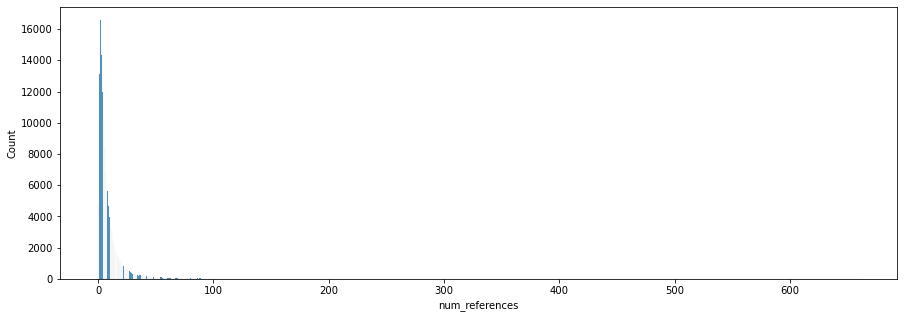

<IPython.core.display.Javascript object>

In [14]:
# Histplot of updated num_references
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="num_references")
plt.show()

#### Observations:
- The distribution of `num_references` remains highly right skewed.
- 25% of entries have 2 or fewer references, which may be a good cutoff to search for `known_for` values.
- Let us view the log transformation of the feature, both for the full dataset, and for `num_references` > 2.

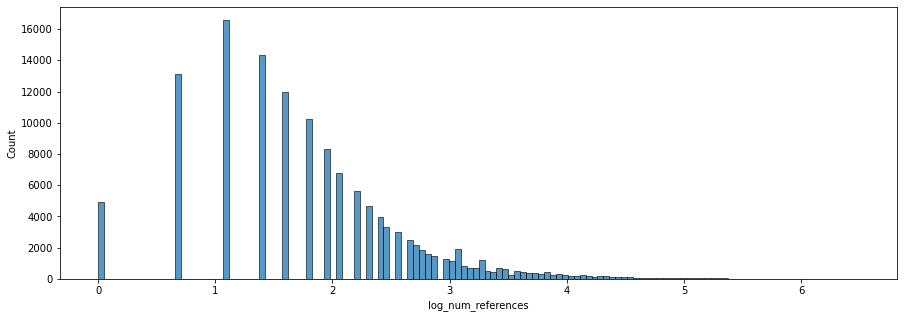

<IPython.core.display.Javascript object>

In [15]:
# Adding column for log_num_references
df["log_num_references"] = df["num_references"].apply(lambda x: np.log(x + 1))

# Histplot of log_num_references
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="log_num_references")
plt.show()

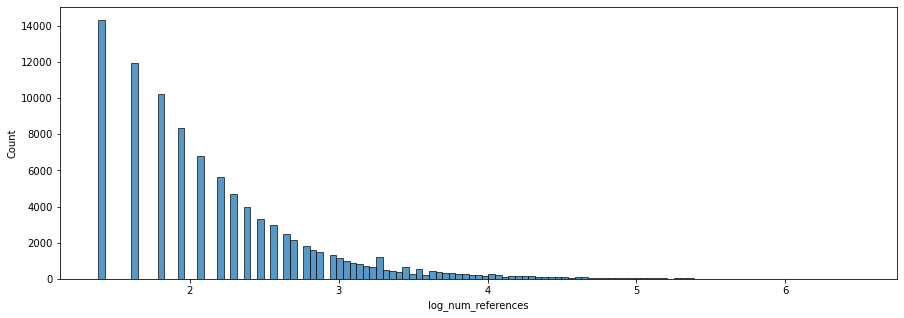

<IPython.core.display.Javascript object>

In [16]:
# Histplot of log_num_references where num_references > 2
plt.figure(figsize=(15, 5))
sns.histplot(data=df[df["num_references"] > 2], x="log_num_references")
plt.show()

#### Observations:
- The distribution is certainly more normalized with the log transformation, but follows a consistent curve for values > 2.
- For this analysis, we will focus on these more noted entries.

## Extracting `known_for` Data
Our goal will be to have some broader categories into which the specific values will fit.  `known_for` is a diverse feature, in that an individual may be known for a long-term role or roles, a specific event, a relationship with another person who is famous, etc.  So, to some extent, we will see what we find and adapt as we go.

Also, we will abandon searching left to right as an individual may fit more than one category, and in no particular order.  For example, Ronald Reagan, is entered as "American actor and politician".  He is most known as the 40th president of The United States, so if we prioritized the first value, he would fit only into the category containing actor.  At the same time, it may have been his acting career that led to his political career.  Both arenas are relevant, so we will aim to capture all categories for an individual.

We will take the following approach:
1. create and check a list of unique values in `info_2_` sub-columns using value_counts, in ascending order.
2. using the pop() method, add each role to it's associated category's list, below, taking care to screen and clarify values that may have multiple meanings, and adding those clarified values to the lists as indicated.
3. combine the lists for each category into one dictionary.
4. Create a corresponding column for each category, initialized equal to 0.
5. search for the values in the dictionary and change the category column to 1 if at least 1 match is found.
6. `cause_of_death` encountered in an `info_2` sub-column will be hard-coded.

#### Restricting our Dataset to Entries with More than 2 References

In [17]:
# Limiting the dataset to entries with > 2 references
df = df[df["num_references"] > 2]
print(f"There are {len(df)} remaining entries in the dataframe.")

There are 98060 remaining entries in the dataframe.


<IPython.core.display.Javascript object>

#### Sub-dividing Numbered `info_` Columns

In [18]:
%%time

# Columns to search
columns = [
    'info_1',
    'info_2',
    'info_3',
    'info_4',
    'info_5',
    'info_6',
    'info_7',
    'info_8',
    'info_9',
    'info_10',
    'info_11'
          ]

# For loop to split column on " and " and separate into respective columns removing leading/trailing white space
for column in columns:
    dataframe = df[df[column].notna()]
    for i in dataframe.index:
        item = dataframe.loc[i, column]
        if item:
            column_lst = item.split(" and ")

            for j in range(len(column_lst)):
                df.loc[i, column + f"_{j}"] = column_lst[j].strip()

# Checking the first 2 rows
df.head(2)

CPU times: total: 9.3 s
Wall time: 9.31 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,info_1_0,info_2_0,info_2_1,info_2_2,info_2_3,info_3_0,info_3_1,info_3_2,info_4_0,info_4_1,info_4_2,info_5_0,info_5_1,info_5_2,info_6_0,info_6_1,info_7_0,info_8_0,info_8_1,info_9_0,info_10_0,info_11_0
0,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21,1994,January,None,None,dancer,ballet designer and director,None,None,None,None,None,None,None,None,86.0,None,United Kingdom of Great Britain and Northern Ireland,None,None,3.091042,NaN,dancer,NaN,NaN,NaN,ballet designer,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12,1994,January,None,None,economist,writer,and academic,None,None,None,None,None,None,None,68.0,None,Ireland,None,None,2.564949,NaN,economist,NaN,NaN,NaN,writer,NaN,NaN,and academic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

#### Finding `known_for` Roles in `info_2_0`

In [19]:
# # Obtaining values for column and their counts
# roles_list = df["info_2_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [20]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

In [21]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_2_0"].notna()].index
#             if "sedevacantism" in df.loc[index, "info_2_0"]
#         ],
#         "info_2_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [22]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [23]:
# # Example code to quick-screen values that may overlap categories
# df.loc[
#     [index for index in df.index if "politician and minister" in df.loc[index, "info"]]
# ]

<IPython.core.display.Javascript object>

In [845]:
# # Example code to quick-check a specific entry
# df[
#     df["info_2_0"]
#     == "politician known for urging crackdown on Tiananmen Square protests of"
# ]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and `cause_of_death`

In [25]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "politician ; first black woman elected to a provincial legislature",
    "politician who was the first woman elected to the New Senate",
    "politician who served as Leader of the House of Lords",
    "politician who served as the th Premier of Manitoba",
    "politician leader of the People Republic of",
    "politician Lieutenant Governor of Manitoba",
    "politician chairman of the People Party of",
    "politician; former Premier of Nova Scotia",
    "politician involved in Mensalão scandal",
    "Democratic Republic of the politician",
    "Progressive Conservative politician",
    "Republican politician from Maryland",
    "politician of the Republican Party",
    "politician of the Communist Party",
    "Democratic Party Party politician",
    "politician from Southern Illinois",
    "Ulster Unionist Party politician",
    "politician of the National Party",
    "politician MP for Lewisham West",
    "Democratic Maryland politician",
    "politician of the Labour Party",
    "politician Mayor of San Bruno",
    "Sindhi nationalist politician",
    "Conservative Party politician",
    "politician from Massachusetts",
    "Libertarian Party politician",
    "politician from West Belfast",
    "Liberal Democrat politician",
    "Republican Party politician",
    "Virgin Islander politician",
    "Virgin Islands politician",
    "politician Representative",
    "Bougainvillean politician",
    "oldest elected politician",
    "Peronist Party politician",
    "Peronist party politician",
    "communist era politician",
    "revolutionary politician",
    "Conservative politician",
    "Gibraltarian politician",
    "Labour Party politician",
    "Makah tribal politician",
    "politician for minority",
    "conservative politician",
    "Fianna Fáil politician",
    "nationalist politician",
    "transgender politician",
    "Khmer Rouge politician",
    "pro Beijing politician",
    "Democratic politician",
    "Trotskyist politician",
    "Republican politician",
    "Polynesian politician",
    "separatist politician",
    "opposition politician",
    "right wing politician",
    "aboriginal politician",
    "republican politician",
    "Queensland politician",
    "communist politician",
    "Fine Gael politician",
    "far right politician",
    "socialist politician",
    "Papua New politician",
    "Communist politician",
    "Antillean politician",
    "Quebecois politician",
    "politician from Iowa",
    "politician statesman",
    "Prominent politician",
    "Sinn Féin politician",
    "prominent politician",
    "Bissauan politician",
    "Gwich'in politician",
    "Republic politician",
    "unionist politician",
    "Northern politician",
    "Southern politician",
    "colonial politician",
    "Muscogee politician",
    "populist politician",
    "Arabian politician",
    "corrupt politician",
    "Quechua politician",
    "Mahoran politician",
    "Iñupiat politician",
    "Mi'kmaq politician",
    "pan ist politician",
    "federal politician",
    "Liberal politician",
    "Labour politician",
    "tribal politician",
    "exiled politician",
    "Romani politician",
    "Colony politician",
    "Ojibwe politician",
    "Herero politician",
    "senior politician",
    "former politician",
    "Lakota politician",
    "Party politician",
    "local politician",
    "Inuit politician",
    "Māori politician",
    "South politician",
    "Labor politician",
    "and n politician",
    "East politician",
    "politician from",
    "Serb politician",
    "Arab politician",
    "Pima politician",
    "Cree politician",
    "Naga politician",
    "UAE politician",
    "pro politician",
    "ian politician",
    "and politician",
    "politician in",
    "politician TD",
    "ni politician",
    "s politician",
    "politician",
    "tractor driver",
    "plaintiff winner against NASA contractor",
    "economist who examined factor endowment",
    "blacklisted by the House Un Activities Committee",
    "Sestigers",
]

politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "voice actor known for the voice of the cartoon cat Garfield",
    "film actor who normally played Western villains",
    "Golden Bell award winning television actor",
    "plaintiff winner against NASA contractor",
    "actor who portrayed Tarzan in six films",
    "Tony Award winning actor of stage",
    "actor best known as The Master in",
    "actor famous for his alter ego",
    "Academy Award nominated actor",
    "Gibraltarian character actor",
    "Academy Award winning actor",
    "actor who appeared in over",
    "Nandi Award winning actor",
    "Bollywood character actor",
    "actor in gay erotic films",
    "Emmy Award winning actor",
    "actor in adventure films",
    "owner of Factory Records",
    "Tony Award winning actor",
    "actor Emmy Award winning",
    "pornographic film actor",
    "silent film child actor",
    "gay pornographic actor",
    "science fiction actor",
    "Yiddish theatre actor",
    "musical theatre actor",
    "actor on Murphy Brown",
    "musical theater actor",
    "film actor of descent",
    "counter culture actor",
    "Bollywood film actor",
    "Tollywood film actor",
    "BAFTA winning actor",
    "pornographic actor",
    "Hall of Fame actor",
    "Emmy winning actor",
    "former child actor",
    "Tony winning actor",
    "anime voice actor",
    "silent film actor",
    "television actor",
    "xiangsheng actor",
    "actor of theater",
    "theatrical actor",
    "indigenous actor",
    "actor in theatre",
    "voice over actor",
    "character actor",
    "Kathakali actor",
    "Bollywood actor",
    "Yan nhaŋu actor",
    "and film actor",
    "Broadway actor",
    "gay porn actor",
    "actor director",
    "actor in films",
    "actor Judas in",
    "actor of stage",
    "actor comedian",
    "actor of films",
    "theater actor",
    "theatre actor",
    "Kannada actor",
    "comedic actor",
    "comic actor ′",
    "musical actor",
    "comedy actor",
    "kabuki actor",
    "Mohawk actor",
    "Kabuki actor",
    "Igorot actor",
    "actor singer",
    "actor in and",
    "former actor",
    "voice actor",
    "child actor",
    "stage actor",
    "comic actor",
    "radio actor",
    "movie actor",
    "based actor",
    "wuxia actor",
    "film actor",
    "porn actor",
    "Sámi actor",
    "and actor",
    "era actor",
    "Noh actor",
    "n actor",
    "actress Little Eva in the first film adaptation of",
    "actress known for beach party films of s",
    "actress also associated with s art scene",
    "actress in the era of old time radio",
    "Hall of Fame pornographic actress",
    "soap opera actress for Televisa",
    "child actress of the silent era",
    "first female actress of cinema",
    "Oscar winning actress of stage",
    "Academy Award winning actress",
    "child actress in silent films",
    '"Venezuelan" B movie actress',
    "César Award winning actress",
    "Tony Award winning actress",
    "character actress of stage",
    "pornographic film actress",
    "AFI Award winning actress",
    "Broadway theatre actress",
    "actress popular in the s",
    "musical theatre actress",
    "Yiddish theatre actress",
    "silent film era actress",
    "award winning actress",
    "actress with dwarfism",
    "pornographic actress",
    "Hall of Fame actress",
    "silent movie actress",
    "and operetta actress",
    "silent film actress",
    "transsexual actress",
    "transgender actress",
    "television actress",
    "soap opera actress",
    "adult film actress",
    "character actress",
    "Yue opera actress",
    "Bollywood actress",
    "s B movie actress",
    "cult film actress",
    "actress of stage",
    "singer & actress",
    "Broadway actress",
    "theatre actress",
    "theater actress",
    "actress soprano",
    "B movie actress",
    "singer actress",
    "cinema actress",
    "Mohawk actress",
    "comedy actress",
    "voice actress",
    "stage actress",
    "child actress",
    "radio actress",
    "movie actress",
    "comic actress",
    "based actress",
    "Yakut actress",
    "opera actress",
    "dwarf actress",
    "Māori actress",
    "film actress",
    "sage actress",
    "born actress",
    "and actress",
    "actress and",
    "actress in",
    "actress on",
    "s actress",
    "actress",
    "television writer",
    "lead singer songwriter musician of rock band God Lives Underwater",
    "screenwriter who won the Academy Award for Best Story for",
    "writer of all episodes of the long running radio serial",
    "Hall of Fame country music singer songwriter",
    "Hall of Fame blues rock singer songwriter",
    "long time Associated Press cuisine writer",
    "Grammy Award winning singer songwriter",
    "outlaw country music singer songwriter",
    "Hall of Fame country singer songwriter",
    "Emmy winning television comedy writer",
    "Academy Award nominated screenwriter",
    "Emmy Award winning television writer",
    "Hall of Fame science fiction writer",
    "Baseball Hall of Fame sportswriter",
    "writer of more than children books",
    "co writer of the s national anthem",
    "writer who won the Newbery Medal",
    "Emmy nominated television writer",
    "rock singer songwriter",
    "country music singer songwriter",
    "southern soul singer songwriter",
    "comic book writer for DC Comics",
    "Emmy Award winning screenwriter",
    "First Nations singer songwriter",
    "Hall of Fame singer songwriter",
    "music singer songwriter",
    "country folk singer songwriter",
    "Arabian writer of Arab descent",
    "motion picture writer director",
    "writer of children literature",
    "award winning children writer",
    "Pulitzer Prize winning writer",
    "death metal singer songwriter",
    "folk music singer songwriter",
    "honky tonk singer songwriter",
    "folk blues singer songwriter",
    "folk rock singer songwriter",
    "psychedelic rock songwriter",
    "singer songwriter",
    "writer of detective fiction",
    "film director screenwriter",
    "red dirt singer songwriter",
    "juvenile literature writer",
    "country western songwriter",
    "writer of Berserker series",
    "writer under the pseudonym",
    "country singer songwriter",
    "Hall of Fame sportswriter",
    "singer songwriter",
    "animation writer producer",
    "Grammy winning songwriter",
    "television writer for and",
    "country music songwriter",
    "television comedy writer",
    "writer of children books",
    "Gujarati language writer",
    "silent film screenwriter",
    "techno singer songwriter",
    "comic book writer artist",
    "reggae singer songwriter",
    "television screenwriter",
    "blues singer songwriter",
    "Hall of Fame songwriter",
    "writer of short stories",
    "writer of crime fiction",
    "Urdu short story writer",
    "writer editor publisher",
    "R&B musician songwriter",
    "telenovela screenwriter",
    "television scriptwriter",
    'writer also known as ""',
    "Chukchi language writer",
    "science fiction writer",
    "folk singer songwriter",
    "rock singer songwriter",
    "advertising copywriter",
    "speechwriter",
    "soul singer songwriter",
    "born singer songwriter",
    "writer of pulp fiction",
    "writer of the Old West",
    "R&B singer songwriter",
    "insurance underwriter",
    "pop singer songwriter",
    "Oriya language writer",
    "writer of comic books",
    "writer on",
    "rockabilly songwriter",
    "writer of screenplays",
    "folk music songwriter",
    "television writer for",
    "children book writer",
    "crime fiction writer",
    "First Nations writer",
    "mystery novel writer",
    "writer of literature",
    "Urdu language writer",
    "writer",
    "comedy scriptwriter",
    "motorcycling writer",
    "experimental writer",
    "martial arts writer",
    "comedy screenwriter",
    "short story writer",
    "non fiction writer",
    "country songwriter",
    "comic strip writer",
    "anime screenwriter",
    "light novel writer",
    "writer of Westerns",
    "spy fiction writer",
    "singer songwriter",
    "television writer",
    "comic book writer",
    "Motown songwriter",
    "soap opera writer",
    "telenovela writer",
    "writer of descent",
    "writer of stories",
    "writer of fiction",
    "agent for writers",
    "nonfiction writer",
    "screenplay writer",
    "gardening writer",
    "writer of novels",
    "and screenwriter",
    "game show writer",
    "BBC Radio writer",
    "Sestigers writer",
    "fake news writer",
    "editorial writer",
    "writer from Nadu",
    "Braziliam writer",
    "detective writer",
    "writer on",
    "children writer",
    "language writer",
    "thriller writer",
    "Gujarati writer",
    "Canarian writer",
    "Guianese writer",
    "resident writer",
    "writer of drama",
    "cookbook writer",
    "writer of books",
    "head writer for",
    "fiction writer",
    "mystery writer",
    "fashion writer",
    "romance writer",
    "fantasy writer",
    "cookery writer",
    "Vepsian writer",
    "Western writer",
    "Arabian writer",
    "Aranese writer",
    "theatre writer",
    "R&B songwriter",
    "comedy writer",
    "travel writer",
    "comics writer",
    "horror writer",
    "Pueblo writer",
    "Romani writer",
    "Lakota writer",
    "Native writer",
    "sitcom writer",
    "script writer",
    "Jewish writer",
    "screenwriter",
    "scriptwriter",
    "crime writer",
    "music writer",
    "speechwriter",
    "manga writer",
    "comic writer",
    "Poet; writer",
    "based writer",
    "youth writer",
    "anime writer",
    "radio writer",
    "lyric writer",
    "food writer",
    "film writer",
    "jazz writer",
    "folk writer",
    "beat writer",
    "Inuk writer",
    "Beat writer",
    "Cree writer",
    "wine writer",
    "Sami writer",
    "poet writer",
    "songwriter",
    "and writer",
    "copywriter",
    "spy writer",
    "TV writer",
    "writer in",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "Manchester City footballer & Grimsby Town manager",
    "who was oldest living AFL VFL footballer",
    "Olympic bronze medal winning footballer",
    "footballer with Tottenham Hotspur and",
    "professional rugby league footballer",
    "Olympic silver medallist footballer",
    "footballer for West Bromwich Albion",
    "footballer at the Summer Olympics",
    "Olympic international footballer",
    "footballer for Manchester City &",
    "footballer for Hartlepool United",
    "footballer for Birmingham City",
    "World Cup champion footballer",
    "footballer for Stoke City F C",
    "footballer for Feyenoord and",
    "Olympic champion footballer",
    "Hall of Fame VFL footballer",
    "footballer for FC Barcelona",
    "footballer for Real Madrid",
    "rugby union footballer for",
    "Leicester City footballer",
    "footballer for Derry City",
    "international footballer",
    "footballer with Essendon",
    "rugby league footballer",
    "professional footballer",
    "Hall of Fame footballer",
    "Ipswich Town footballer",
    "footballer with one cap",
    "rugby union footballer",
    "association footballer",
    "promising footballer",
    "Olympic footballer[]",
    "World Cup footballer",
    "Olympic footballer",
    "footballer Norwich",
    "Arabian footballer",
    "footballer player",
    "former footballer",
    "rules footballer",
    "rugby footballer",
    "SANFL footballer",
    "WANFL footballer",
    "Serb footballer",
    "WAFL footballer",
    "VFL footballer",
    "footballer for",
    "AFL footballer",
    "era footballer",
    "and footballer",
    "footballer []",
    "footballer[]",
    "s footballer",
    "footballer",
    "football player paralyzed during a game in",
    "football player with the San Francisco ers",
    "Choctaw Chickasaw gridiron football player",
    "football player with the Cleveland Browns",
    "Olympic silver medalist football player",
    "Olympic bronze medalist football player",
    "Heisman Trophy winning football player",
    "football player for Manchester United",
    "Hall of Fame college football player",
    "football player born with no legs",
    "Hall of Fame CFL football player",
    "NFL Hall of Fame football player",
    "and association football player",
    "football player Dallas Cowboys",
    "international football player",
    "Hall of Fame football player",
    "professional football player",
    "rugby league football player",
    "football player of ethnicity",
    "association football player",
    "rugby union football player",
    "university football player",
    "former NFL football player",
    "football playerand a coach",
    "rugby football player for",
    "gridironl footballplayer",
    "gridiron football player",
    "college football player",
    "Olympic football player",
    "former football player",
    "rules football player",
    "arena football player",
    "rugby football player",
    "AAFC football player",
    "VFL football player",
    "CFL football player",
    "and football player",
    "NFL football player",
    "AFL football player",
    "pro football player",
    "NBA football player",
    "football playerer",
    "football player",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "manual typewriter expert",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "haulage contractor",
    "building contractor",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = []
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    'known for urging crackdown on Tiananmen Square protests of',
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = ["sedevacantism"]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = []
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = []
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "factory worker",
    "civilian contractor",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "dog actor",
    "lemur actor",
    "canine actor",
    "Kodiak bear actor",
    "scarlet macaw actor",
    "Jack Russell Terrier dog actor",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [26]:
# Combining separate lists into one dictionary
known_for_dict = {
    "sciences": sciences,
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "arts": arts,
    "sports": sports,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
}

<IPython.core.display.Javascript object>

#### Initializing `known_for` Category Columns

In [27]:
# Creating columns for each category
for category in known_for_dict:
    df[category] = 0

# Checking a sample
df.sample()

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,info_1_0,info_2_0,info_2_1,info_2_2,info_2_3,info_3_0,info_3_1,info_3_2,info_4_0,info_4_1,info_4_2,info_5_0,info_5_1,info_5_2,info_6_0,info_6_1,info_7_0,info_8_0,info_8_1,info_9_0,info_10_0,info_11_0,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species
130279,22,Kamil Jalilov,", 84, Azerbaijani musician.",https://en.wikipedia.org/wiki/Kamil_Jalilov,13,2022,February,None,None,musician,None,None,None,None,None,None,None,None,None,84.0,None,Azerbaijan,None,None,2.639057,NaN,musician,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

#### Extracting Category from `info_2_0` with `known_for_dict`

In [35]:
%%time

# Column to check
column = 'info_2_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking a sample of rows
df.sample(2)

CPU times: total: 6min 28s
Wall time: 6min 29s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,info_1_0,info_2_0,info_2_1,info_2_2,info_2_3,info_3_0,info_3_1,info_3_2,info_4_0,info_4_1,info_4_2,info_5_0,info_5_1,info_5_2,info_6_0,info_6_1,info_7_0,info_8_0,info_8_1,info_9_0,info_10_0,info_11_0,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
73035,9,James L. Reveal,", 73, American botanist.",https://en.wikipedia.org/wiki/James_L._Reveal,26,2015,January,None,None,botanist,None,None,None,None,None,None,None,None,None,73.0,None,United States of America,None,None,3.295837,NaN,botanist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
107375,10,Yury Luzhkov,", 83, Russian politician, Mayor of Moscow , complications during heart surgery.",https://en.wikipedia.org/wiki/Yury_Luzhkov,57,2019,December,,None,politician,Mayor of Moscow,complications during heart surgery,None,None,None,None,None,None,None,83.0,None,Russia,None,1992 2010,4.060443,NaN,,NaN,NaN,NaN,Mayor of Moscow,NaN,NaN,complications during heart surgery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [36]:
# Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 74899 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict`, repeating the same process.

#### Finding `known_for` Roles in `info_2_0`

In [94]:
# # Obtaining values for column and their counts
# roles_list = df["info_2_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [97]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

In [98]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_2_0"].notna()].index
#             if "artists' model" in df.loc[index, "info_2_0"]
#         ],
#         "info_2_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [99]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [100]:
# # Example code to quick-check a specific entry
# df[df["info_2_0"] == "con artist"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and `cause_of_death`

In [93]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "maverick",
    "Gros Ventre",
    "first President of Senegal;",
    "known for campaigns against fast food chains",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "journalist https: web archive org web http: wcco com local local_story_ htmlurl= |archive date= October }}< ref>",
    "journalist responsible for North Caucasus news on Channel One",
    "journalist who helped return paintings looted by the Nazis",
    "broadcast journalist for NBC News who was news anchor of",
    "photojournalist known for her coverage of the War in",
    "journalist who reported on the Revolution",
    "journalist who worked for from through",
    "journalist who supported democracy",
    "Pulitzer Prize winning journalist",
    "journalist Pulitzer Prize winner",
    "pioneering broadcast journalist",
    "freelance cameraman journalist",
    "journalist for the Daily Mail",
    "photojournalist for magazine",
    "classical music journalist",
    "freelance photo journalist",
    "journalist for Al Jazeera",
    "journalist for al Arabiya",
    "investigative journalist",
    "entertainment journalist",
    "show business journalist",
    "country music journalist",
    "music radio journalist",
    "journalist pamphleteer",
    "television journalist",
    "journalists'",
    "th century journalist",
    "rock music journalist",
    "jazz radio journalist",
    "newspaper journalist",
    "broadcast journalist",
    "freelance journalist",
    "literary journalist",
    "CBS News journalist",
    "photojournalist",
    "fashion journalist",
    "cookery journalist",
    "Balochi journalist",
    "Arabian journalist",
    "online journalist",
    "music journalist",
    "radio journalist",
    "photo journalist",
    "video journalist",
    "photojournalist",
    "film journalist",
    "jazz journalist",
    "arts journalist",
    "wine journalist",
    "East journalist",
    "born journalist",
    "Serb journalist",
    "news journalist",
    "CBS journalist",
    "and journalist",
    "journalist and",
    "journalist of",
    "TV journalist",
    "journalist",
    "mezzo soprano opera singer who sang with the Metropolitan Opera for many years",
    "opera singer best known for her performances with the Sadler Wells company",
    "singer formerly of the Happy Goodman Family",
    'singer known worldwide as the "Queen of Fado"',
    "singer Happy Goodman Family",
    'country music singer: "She Actin\' Single "',
    "lead singer of roots reggae group Culture",
    'Swamp Pop singer of "I\'m a Fool to Care"',
    "singer with The Soul Stirrers",
    "singer with Ladysmith Black Mambazo",
    "Hall of Fame country music singer",
    "lead singer of pop group The Move",
    "accomplished singer composer from",
    "Gwalior gharana classical singer",
    "lead singer of s AOR band Boston",
    "coloratura soprano opera singer",
    "lead singer of The Go Betweens",
    "Jaipur Atrauli gharana singer",
    "lead singer of Molly Hatchet",
    "R&B singer with The Drifters",
    "singer for Guy Lombardo band",
    "concert bass baritone singer",
    "singer known for her work on",
    "Hall of Fame country singer",
    '"New Wave" vallenato singer',
    "former singer for The Clash",
    "Hindustani classical singer",
    "mezzo soprano opera singer",
    "bass baritone opera singer",
    "lead singer of The Sylvers",
    "rock singer for Juggernaut",
    "advisor to Henry Kissinger",
    "mezzo soprano folk singer",
    "coloratura soprano singer",
    "Juno Award winning singer",
    "singer of traditional pop",
    "Ollywood playback singer",
    "Hall of Fame rock singer",
    'tango singer known as ""',
    "recording artist; singer",
    "singer for Shocking Blue",
    "singer with The Spinners",
    "Hall of Fame R&B singer",
    "Rabindra Sangeet singer",
    "singer of Drowning Pool",
    "singer & bass guitarist",
    "traditional pop singer",
    "sevdalinka folk singer",
    "national anthem singer",
    "music singer",
    "lead singer of Freddie",
    "rhythm & blues singer",
    "baritone opera singer",
    "Grammy winning singer",
    "operatic tenor singer",
    "electric blues singer",
    "one hit wonder singer",
    "country music singer",
    "soprano opera singer",
    "operatic bass singer",
    "bass baritone singer",
    "film playback singer",
    "rock 'n' roll singer",
    "Inuktitut pop singer",
    "popular music singer",
    "mezzo soprano singer",
    "Isleño décima singer",
    "Hall of Fame singer",
    "Tuvan throat singer",
    "Mi'kmaq folk singer",
    "bass concert singer",
    "baritone pop singer",
    "flamenco pop singer",
    "thrash metal singer",
    "Nazrul Geeti singer",
    "pop schlager singer",
    "country folk singer",
    "Tejano music singer",
    "traditional singer",
    "heavy metal singer",
    "Hokkien pop singer",
    "death metal singer",
    "rock urbano singer",
    "Nazrul Geet singer",
    "smooth soul singer",
    "Heavy metal singer",
    "lovers rock singer",
    "transsexual singer",
    "rockabilly singer",
    "soul blues singer",
    "sevdalinka singer",
    "music hall singer",
    "campursari singer",
    "space rock singer",
    "turbo folk singer",
    "a cappella singer",
    "bass opera singer",
    "Latin jazz singer",
    "folk music singer",
    "Hindustani singer",
    "folk blues singer",
    "honky tonk singer",
    "classical singer",
    "punk rock singer",
    "bluegrass singer",
    "luk thung singer",
    "folk rock singer",
    "singer guitarist",
    "vallenato singer",
    "luk krung singer",
    "jazz funk singer",
    "Inuktitut singer",
    "pop music singer",
    "singer songwrite",
    "canto pop singer",
    "glam rock singer",
    "soul jazz singer",
    "punk band singer",
    "soul funk singer",
    "playback singer",
    "schlager singer",
    "big band singer",
    "flamenco singer",
    "Carnatic singer",
    "language singer",
    "singer composer",
    "Schlager singer",
    "highlife singer",
    "operatic singer",
    "baritone singer",
    "singer of the s",
    "khananda singer",
    "R&B soul singer",
    "comedian singer",
    "pop rock singer",
    "operetta singer",
    "showband singer",
    "country singer",
    "cabaret singer",
    "popular singer",
    "soprano singer",
    "doo wop singer",
    "Dhrupad singer",
    "qawwali singer",
    "protest singer",
    "Western singer",
    "calypso singer",
    "novelty singer",
    "bachata singer",
    "chanson singer",
    "Qawwali singer",
    "Calypso singer",
    "Kannada singer",
    "back up singer",
    "ryūkōka singer",
    "reggae singer",
    "bolero singer",
    "ghazal singer",
    "cumbia singer",
    "Tejano singer",
    "Chaabi singer",
    "Romani singer",
    "bhajan singer",
    "Chalga singer",
    "thumri singer",
    "huayno singer",
    "backup singer",
    "mugham singer",
    "Oneida singer",
    "Yaghan singer",
    "anthem singer",
    "shaabi singer",
    "Taarab singer",
    "Berber singer",
    "Hutsul singer",
    "opera singer",
    "blues singer",
    "salsa singer",
    "tango singer",
    "banda singer",
    "samba singer",
    "Tatar singer",
    "Mbira singer",
    "rumba singer",
    "forró singer",
    "tenor singer",
    "morna singer",
    "s pop singer",
    "Choro singer",
    "druze singer",
    "Opera singer",
    "copla singer",
    "folk singer",
    "jazz singer",
    "soul singer",
    "rock singer",
    "fado singer",
    "punk singer",
    "waka singer",
    "band singer",
    "singer poet",
    "funk singer",
    "bass singer",
    "enka singer",
    "Baul singer",
    "pop singer",
    "R&B singer",
    "folksinger",
    "raï singer",
    "singer",
    'author whose story "The Wisdom of Eve" inspired the film',
    "Newbery Medal winning author of children books",
    "author under the pseudonym of John Godey",
    "author & syndicated newspaper columnist",
    "author of cookbooks on Southern cuisine",
    "Sahitya Akademi Award winning author",
    "National Book Award winning author",
    "author of science fiction novellas",
    "author of Chicka Chicka Boom Boom",
    "author of",
    "author of books including novels",
    "author of lesbian themed works",
    "author of children literature",
    "Pulitzer Prize winning author",
    "author of books",
    "speculative fantasy author",
    "Nobel Prize winning author",
    "author of",
    "author of children books",
    "author of mystery novels",
    "language children author",
    "Third Generation author",
    "autobiographical author",
    "science fiction author",
    "children’s book author",
    "kosher cookbook author",
    "Lovelock Paiute author",
    "author of pulp fiction",
    "author children books",
    "author on the",
    "author of gay erotica",
    "children book author",
    "nouveau roman author",
    "crime fiction author",
    "author of spy novels",
    "author of thrillers",
    "etiquette authority",
    "author & biographer",
    "young adult author",
    "gastronomic author",
    "spy fiction author",
    "author of cookbook",
    "comic book author",
    "true crime author",
    "Inuvialuit author",
    "author of fantasy",
    "author of fiction",
    "Sephardic author",
    "author of novels",
    "children author",
    "cookbook author",
    "Gujarati author",
    "author of plays",
    "language author",
    "culinary author",
    "fantasy author",
    "mystery author",
    "Occitan author",
    "Tlingit author",
    "romance author",
    "South n author",
    "western author",
    "graphic author",
    "author of food",
    "horror author",
    "Jewish author",
    "comics author",
    "sci fi author",
    "Native author",
    "manga author",
    "crime author",
    "pagan author",
    "co author of",
    "Urdu author",
    "UFO author",
    "also a world renowned poet",
    "poet who wrote about the Dust Bowl",
    "Pulitzer Prize winning poet",
    "poet of the Beat Generation",
    "Kannada language poet",
    "Occitan language poet",
    "Beat generation poet",
    "Beat Generation poet",
    "prize winning poet",
    "poet of the School",
    "experimental poet",
    "K'iche' Maya poet",
    "Ulster Scots poet",
    "contemporary poet",
    "Martiniquan poet",
    "avant garde poet",
    "surrealist poet",
    "vernacular poet",
    "Nuyorican poet",
    "Kashubian poet",
    "language poet",
    "Movement poet",
    "poet laureate",
    "Kannada poet",
    "Arabian poet",
    "Chicano poet",
    "Mi'kmaq poet",
    "Native poet",
    "Mormon poet",
    "Baháʼí poet",
    "ghazal poet",
    "rhythm poet",
    "singer poet",
    "Latino poet",
    "Pashto poet",
    "Druze poet",
    "Māori poet",
    "Urdu poet",
    "Beat poet",
    "beat poet",
    "Odia poet",
    "and poet",
    "dub poet",
    "poetess",
    "n poet",
    "poets",
    "poet",
    "based graffiti artist whose works were included in the Venice Biennale",
    "choreographer appointed as Sydney Dance Company artistic director",
    "artist known for his role in the Conceptualism",
    "textile artist who specialized in embroidery",
    "Academy Award winning visual effects artist",
    "artist who was a member of the Regina Five",
    "internationally recognized graphic artist",
    "visual artist known for her still lives",
    "internationally exhibited Navajo artist",
    "rock concert graphic poster artist",
    "stateless auto destructive artist",
    "avant garde installation artist",
    "figurative expressionist artist",
    "Hall of Fame comic book artist",
    "special effects make up artist",
    "abstract expressionist artist",
    "Golden Age comic book artist",
    "Oscar winning make up artist",
    "underground graffiti artist",
    "animation background artist",
    "motion picture matte artist",
    "film special effects artist",
    "contemporary visual artist",
    "experimental visual artist",
    "wet folding origami artist",
    "underground comics artist",
    "psychedelic poster artist",
    "sound installation artist",
    "experimental music artist",
    "video game concept artist",
    "television make up artist",
    "nomadic lifestyle artist",
    "recording artist; singer",
    "electronic music artist",
    "courtroom sketch artist",
    "dancehall reggae artist",
    "rock album cover artist",
    "Les Automatistes artist",
    "drag queen music artist",
    "special effects artist",
    "science fiction artist",
    "comic book artist born",
    "visual effects artist",
    "color abstract artist",
    "graphic design artist",
    "fantasy gaming artist",
    "musical Thavil artist",
    "neo conceptual artist",
    "fantasy coffin artist",
    "stained glass artist",
    "nonconformist artist",
    "environmental artist",
    "expressionist artist",
    "First Nations artist",
    "impressionist artist",
    "monumentalist artist",
    "horticultural artist",
    "n artist from Utopia",
    "country music artist",
    "artistic draughtsman",
    "neo mannerist artist",
    "contemporary artist",
    "installation artist",
    "World War II artist",
    "Peking opera artist",
    "artist photographer",
    "contemperary artist",
    "music artist",
    "Papunya Tula artist",
    "wood carving artist",
    "film make up artist",
    "Muay martial artist",
    "movie poster artist",
    "film concept artist",
    "performance artist",
    "comic strip artist",
    "avant garde artist",
    "film poster artist",
    "hand shadow artist",
    "watercolour artist",
    "lianhuanhua artist",
    "motorsports artist",
    "multi media artist",
    "psychedelic artist",
    "New Realist artist",
    "and graphic artist",
    "transgender artist",
    "shadow play artist",
    "comic book artist",
    "conceptual artist",
    "artistic director",
    "voice over artist",
    "figurative artist",
    "watercolor artist",
    "minimalist artist",
    "commercial artist",
    "indigenous artist",
    "surrealist artist",
    "Indigenous artist",
    "multimedia artist",
    "Yakshagana artist",
    "aboriginal artist",
    "West Coast artist",
    "artist of origins",
    "storyboard artist",
    "landscape artist",
    "artistic gymnast",
    "Kathakali artist",
    "botanical artist",
    "recording artist",
    "highwire artiste",
    "modernist artist",
    "harmonism artist",
    "newspaper artist",
    "Eurodance artist",
    "geometric artist",
    "animation artist",
    "based pop artist",
    "courtroom artist",
    "artist of origin",
    "abstract artist",
    "wildlife artist",
    "graffiti artist",
    "outsider artist",
    "portrait artist",
    "ceramics artist",
    "forensic artist",
    "heraldic artist",
    "computer artist",
    "hologram artist",
    "theatre artiste",
    "martial artist",
    "graphic artist",
    "textile artist",
    "ceramic artist",
    "make up artist",
    "pottery artist",
    "artists' model",
    "fantasy artist",
    "concept artist",
    "plastic artist",
    "hip hop artist",
    "cabaret artist",
    "kinetic artist",
    "dubbing artist",
    "weaving artist",
    "Iñupiat artist",
    "Western artist",
    "artist in wood",
    "trapeze artist",
    "theatre artist",
    "comedic artist",
    "carving artist",
    "Chicano artist",
    "woodcut artist",
    "thangka artist",
    "visual artist",
    "comics artist",
    "makeup artist",
    "street artist",
    "tattoo artist",
    "circus artist",
    "Ojibwe artist",
    "poster artist",
    "reggae artist",
    "enamel artist",
    "marine artist",
    "fetish artist",
    "pencil artist",
    "manhua artist",
    "equine artist",
    "native artist",
    "sketch artist",
    "modern artist",
    "Native artist",
    "Navajo artist",
    "design artist",
    "manga artist",
    "glass artist",
    "comic artist",
    "video artist",
    "voice artist",
    "Inuit artist",
    "fiber artist",
    "sound artist",
    "quilt artist",
    "Kiowa artist",
    "media artist",
    "batik artist",
    "pixel artist",
    "Kunqu artist",
    "blues artist",
    "mural artist",
    "artist model",
    "Route artist",
    "naïve artist",
    "strip artist",
    "movie artist",
    "folk artist",
    "mime artist",
    "Inuk artist",
    "drag artist",
    "land artist",
    "sand artist",
    "born artist",
    "fine artist",
    "rock artist",
    "game artist",
    "pop artist",
    "war artist",
    "rap artist",
    "R&B artist",
    "ink artist",
    "and artist",
    "n artist",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "baseball player who was second oldest living major league player",
    "baseball player who hit the first grand slam in the Mets history",
    "baseball player in the All Girls Professional Baseball League",
    "Hall of Fame baseball player for the Nishitetsu Lions",
    "baseball player with the Cleveland Indians",
    "Collegiate Hall of Fame baseball player",
    "Negro leagues baseball player",
    "Hall of Fame baseball player",
    "Negro league baseball player",
    "professional baseball player",
    "minor league baseball player",
    "one armed baseball player",
    "Baseball baseball player",
    "Republic baseball player",
    "Olympic baseball player",
    "AAGPBL baseball player",
    "former baseball player",
    "MLB baseball player",
    "All baseball player",
    "baseball player",
    "Olympic taekwondo martial artist",
    "artistic gymnastics coach",
    "Olympic artistic gymnast",
    "mixed martial artist",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = []
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "contractor",
    "businessman responsible for marketing the hula hoop",
    "businessman who founded Taylor Woodrow",
    "businessman who founded Pottery Barn",
    "businessman co founder of the River",
    "equine pharmaceutical businessman",
    "businessman oil company executive",
    "descent millionaire businessman",
    "businessman",
    "Arabian cosmetics businessman",
    "food production businessman",
    "agricultural businessman",
    "Gibraltarian businessman",
    "billionaire businessman",
    "real estate businessman",
    "millionaire businessman",
    "automotive businessman",
    "transport businessman",
    "emerald businessman",
    "grocery businessman",
    "Arabian businessman",
    "retail businessman",
    "Born businessman",
    "cork businessman",
    "n businessman",
    "businessman",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "authority on black people in the ancient world",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = []
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "Latter day Saints general authority",
    "general authority of the LDS Church",
    "LDS Church general authority",
    "general authority LDS Church",
    "Mormon general authority",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = ["and\xa0philanthropist"]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = ["implicated in the murder of Daniel Pearl", "scam artist", "con artist"]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = []
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [101]:
# Combining separate lists into one dictionary
known_for_dict = {
    "sciences": sciences,
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "arts": arts,
    "sports": sports,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
}

<IPython.core.display.Javascript object>

#### Extracting Category from `info_2` with `known_for_dict`

In [102]:
%%time

# Column to check
column = 'info_2_0'

# Start dataframe
dataframe = df[df[column].notna()]

# For loop to find role in column and extract it as category
for category, category_lst in known_for_dict.items():
    for role in category_lst:
        for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking a sample of rows
df.sample(2)

CPU times: total: 6min 42s
Wall time: 6min 44s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,info_1_0,info_2_0,info_2_1,info_2_2,info_2_3,info_3_0,info_3_1,info_3_2,info_4_0,info_4_1,info_4_2,info_5_0,info_5_1,info_5_2,info_6_0,info_6_1,info_7_0,info_8_0,info_8_1,info_9_0,info_10_0,info_11_0,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
6199,2,William Van Pelt,", 91, American politician.",https://en.wikipedia.org/wiki/William_Van_Pelt,5,1996,June,None,None,politician,None,None,None,None,None,None,None,None,None,91.0,None,United States of America,None,None,1.791759,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,1
128706,6,Volodymyr Pak,", 87, Ukrainian politician, deputy .",https://en.wikipedia.org/wiki/Volodymyr_Pak,3,2022,January,,None,politician,deputy,None,None,None,None,None,None,None,None,87.0,None,Ukraine,None,2005 2006,1.386294,NaN,,NaN,NaN,NaN,deputy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [103]:
#### Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 65620 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict`, repeating the same process.

#### Finding `known_for` Roles in `info_2_0`

In [258]:
# # Obtaining values for column and their counts
# roles_list = df["info_2_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [256]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

In [255]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_2_0"].notna()].index
#             if "comedian" in df.loc[index, "info_2_0"]
#         ],
#         "info_2_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [254]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [253]:
# # Example code to quick-check a specific entry
# df[df["info_2_0"] == "ice skating comedian"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and `cause_of_death`

In [259]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "prosecuting lawyer who was the first attorney in the to achieve a murder conviction with exclusively circumstantial evidence",
    "lawyer who fought for equitable access to legal services",
    "lawyer who co founded the National Lawyers Guild",
    "lawyer who defended pacifist Ezra Pound",
    "lawyer at the Department of Justice",
    "defense lawyer for Saddam Hussein",
    "lawyer who defended dissidents",
    "intellectual property lawyer",
    "lawyer for the Grateful Dead",
    "lawyer for left wing clients",
    "lawyer civil rights activist",
    "divorce lawyer to the stars",
    "lawyer political advisor",
    "criminal defense lawyer",
    "anti segregation lawyer",
    "First Amendment lawyer",
    "public interest lawyer",
    "constitutional lawyer",
    "animal welfare lawyer",
    "entertainment lawyer",
    "environmental lawyer",
    "civil rights lawyer",
    "human rights lawyer",
    "Gibraltarian lawyer",
    "immigration lawyer",
    "LGBT rights lawyer",
    "arbitration lawyer",
    "bankruptcy lawyer",
    "corporate lawyer",
    "jailhouse lawyer",
    "academic lawyer",
    "criminal lawyer",
    "defense lawyer",
    "trial lawyer",
    "labor lawyer",
    "South lawyer",
    "Māori lawyer",
    "libel lawyer",
    "pro lawyer",
    "tax lawyer",
    "lawyer",
    "diplomat with the Department of State",
    "Chickasaw Nation diplomat",
    "diplomatand ambassador",
    "diplomat Ambassador to",
    "first female diplomat",
    "government diplomat",
    "diplomat serving in",
    "communist diplomat",
    "diplomatic clerk",
    "career diplomat",
    "era diplomat",
    "diplomat to",
    "diplomat",
    "AIDS policy coordinator",
    "economist who did pioneering research in linear",
    "economist specializing in public economics",
    "Nobel Prize winning economist",
    "agricultural economist",
    "development economist",
    "libertarian economist",
    "political economist",
    "feminist economist",
    "Gandhian economist",
    "monetary economist",
    "Marxian economist",
    "Marxist economist",
    "health economist",
    "labor economist",
    "macroeconomist",
    "and economist",
    "Virgin Islander jurist",
    "federal jurist",
    "jurist",
    "senior judge of the District Court for the Southern District of Alabama",
    "federal judge who crafted the mass settlement of asbestos lawsuits",
    "judge of the District Court for the Western District of Missouri",
    "former chief judge of the Court of Appeals for the Third Circuit",
    "senior judge of the District Court for the Southern District of",
    "Superior Court judge who presided over the Charles Manson trial",
    "senior judge of the District Court for the Eastern District of",
    "circuit judge for the Court of Appeals for the Ninth Circuit",
    "senior judge of the Court of Appeals for the Ninth Circuit",
    "senior judge of the District Court for the District of New",
    "senior judge of the Family Division of the High Court",
    "district judge overseeing desegregation in the South",
    "judge on the Court of Appeals for the Third Circuit",
    "who was the first female Supreme Court judge",
    "senior judge for the Central District Court",
    "judge on the Supreme Court of Queensland",
    "prominent judge sitting in highest court",
    "judge on the Oregon Supreme Court",
    "judge of the High Court of and",
    "senior federal appellate judge",
    "judge of the ACT Supreme Court",
    "and Ohio judge for years",
    "City family court judge",
    "Bankruptcy Court judge",
    "Virgin Islander judge",
    "first female judge of",
    "district court judge",
    "senior federal judge",
    "senior circuit judge",
    "District Court judge",
    "Supreme Court judge",
    "appeals court judge",
    "former chief judge",
    "High Court judge",
    "district judge",
    "federal judge",
    "circuit judge",
    "senior judge",
    "judge in the",
    "Navajo judge",
    "state judge",
    "chief judge",
    "State judge",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "actor",
    "artist",
    "geometric abstractionist painter",
    "abstract expressionist painter",
    "representational painter",
    "magic realist painter",
    "expressionist painter",
    "impressionist painter",
    "photorealist painter",
    "surrealistic painter",
    "avant garde painter",
    "watercolour painter",
    "color field painter",
    "Puerto Ricanpainter",
    "and realist painter",
    "mixed media painter",
    "surrealist painter",
    "figurative painter",
    "watercolor painter",
    "Andalusian painter",
    "aboriginal painter",
    "television painter",
    "landscape painter",
    "modernist painter",
    "Madhubani painter",
    "painter of themes",
    "cityscape painter",
    "Delftware painter",
    "abstract painter",
    "portrait painter",
    "folk art painter",
    "realist painter",
    "outback painter",
    "Realist painter",
    "Yolngu painter",
    "Coptic painter",
    "Cubist painter",
    "Native painter",
    "Ojibwe painter",
    "COBRA painter",
    "naïve painter",
    "icon painter",
    "born painter",
    "barn painter",
    "Yōga painter",
    "and painter",
    "signpainter",
    "painter of",
    "painter",
    "composer of Catholic liturgical songs",
    "Academy Award winning film score composer",
    "composer of contemporary classical music",
    "composer best known for work on Robotech",
    "composer of classic film music such as",
    "contemporary classical music composer",
    "composer of background music for and",
    "Academy Award winning film composer",
    "Pulitzer Prize winning composer",
    "contemporary classical composer",
    "composer prolific in film music",
    "composer of Broadway musicals",
    "composer of classical music",
    "Tony Award winning composer",
    "Emmy award winning composer",
    "experimental music composer",
    "electronic music composer",
    "video game music composer",
    "television score composer",
    "classical guitar composer",
    "composer of feature films",
    "classical music composer",
    "musical theater composer",
    "composer of film scores",
    "composer of orchestral",
    "country music composer",
    "experimental composer",
    "music composer",
    "jazz pianist composer",
    "avant garde composer",
    "composer of musicals",
    "film score composer",
    "film music composer",
    "television composer",
    "microtonal composer",
    "soundtrack composer",
    "video game composer",
    "theme song composer",
    "rockabilly composer",
    "classical composer",
    "Aromanian composer",
    "Cantopop composer",
    "composer of music",
    "musician composer",
    "Broadway composer",
    "musical composer",
    "composer of film",
    "hip hop composer",
    "migrant composer",
    "jingle composer",
    "music composer",
    "opera composer",
    "tango composer",
    "Filin composer",
    "Māori composer",
    "film composer",
    "jazz composer",
    "and composer",
    "composer",
    "musician who played at the Johannesburg Live concert",
    "musician with the hardcore punk band Big Boys",
    "musician known for his work with the Beatles",
    "musician known for his work on the theme",
    "musician credited with creating mambo",
    "musician for acoustic rock band Plush",
    'jazz musician known as "Mr Swing"',
    'musician known as "Saint Thomas"',
    "Hall of Fame bluegrass musician",
    "Grammy Award winning musician",
    "Grammy award winning musician",
    "award winning blues musician",
    "musician with the Bothy Band",
    "Hall of Fame blues musician",
    "reggae cross over musician",
    "Country & Western musician",
    "electronic dance musician",
    "traditional jazz musician",
    "dancehall garage musician",
    "electric blues musician",
    "Nazrul Sangeet musician",
    "big band style musician",
    "dixieland jazz musician",
    "Chicago blues musician",
    "Igbo highlife musician",
    "Andean cumbia musician",
    "Detroit blues musician",
    "Creole zydeco musician",
    "country blues musician",
    "Hall of Fame musician",
    "experimental musician",
    "contra dance musician",
    "rock 'n roll musician",
    "kadongo kamu musician",
    "traditional musician",
    "synthesizer musician",
    "avant garde musician",
    "garage punk musician",
    "jazz fusion musician",
    "heavy metal musician",
    "electronic musician",
    "rockabilly musician",
    "Indigenous musician",
    "minimalist musician",
    "bossa nova musician",
    "acid house musician",
    "Hindustani musician",
    "blues rock musician",
    "vocal jazz musician",
    "Volksmusik musician",
    "Rockabilly musician",
    "bluegrass musician",
    "classical musician",
    "folk rock musician",
    "punk rock musician",
    "dancehall musician",
    "vallenato musician",
    "surf rock musician",
    "Classical musician",
    "steel pan musician",
    "highlife musician",
    "mariachi musician",
    "big band musician",
    "steelpan musician",
    "musician activist",
    "outsider musician",
    "Steelpan musician",
    "military musician",
    "musician composer",
    "and rock musician",
    "children musician",
    "musician of music",
    "Indorock musician",
    "country musician",
    "hip hop musician",
    "shehnai musician",
    "session musician",
    "ambient musician",
    "calypso musician",
    "skiffle musician",
    "reggae musician",
    "gospel musician",
    "cumbia musician",
    "kwaito musician",
    "Tejano musician",
    "Jibaro musician",
    "Celtic musician",
    "Native musician",
    "street musician",
    "Reggae musician",
    "Romani musician",
    "blues musician",
    "polka musician",
    "Cajun musician",
    "tango musician",
    "roots musician",
    "salsa musician",
    "Māori musician",
    "khyal musician",
    "samba musician",
    "Tuvan musician",
    "mbira musician",
    "grime musician",
    "ashik musician",
    "benga musician",
    "Gnawa musician",
    "cajun musician",
    "Benga musician",
    "jazz musician",
    "rock musician",
    "folk musician",
    "soul musician",
    "punk musician",
    "Bubu musician",
    "Jùjú musician",
    "soca musician",
    "musician from",
    "R&B musician",
    "pop musician",
    "ska musician",
    "oud musician",
    "rap musician",
    "musician",
    "Academy Award winning film director",
    "Bodil Award winning film director",
    "gay pornographic film director",
    "horror film director of the s",
    "pornographic film director",
    "documentary film director",
    "independent film director",
    "Bollywood film director",
    "film director producer",
    "B movie film director",
    "film director for MGM",
    "adult film director",
    "short film director",
    "and film director",
    "era film director",
    "art film director",
    "film director in",
    "n film director",
    "film director",
    "landscape architect",
    "medieval architectural",
    "architectural lighting designer",
    "Southwestern style architect",
    "architectural photographer",
    "architectural",
    "architecture critic for",
    "horticultural architect",
    "architecture",
    "architecture",
    "architectural critic",
    "landscape architect",
    "modernist architect",
    "architecture critic",
    "architect in Oregon",
    "temple architect",
    "bridge architect",
    "church architect",
    "naval architect",
    "based architect",
    "and architect",
    "architectural",
    "architecture",
    "novelist who wrote a book shortlisted for the Booker Prize in",
    "novelist whose books were popular in the s",
    "Booker Prize winning novelist",
    "novelist under pseudonyms",
    "science fiction novelist",
    "experimental novelist",
    "young adult novelist",
    "adventure novelist",
    "romantic novelist",
    "children novelist",
    "adaption novelist",
    "fantasy novelist",
    "romance novelist",
    "mystery novelist",
    "Western novelist",
    "giallo novelist",
    "horror novelist",
    "crime novelist",
    "wuxia novelist",
    "Nisei novelist",
    "spy novelist",
    "n novelist",
    "novelist",
    'photographer who pioneered "environmental portraiture"',
    "photographer of the",
    "photographer during",
    "photographer of indigenous peoples in",
    "Pulitzer Prize winning photographer",
    "photographer based in San Francisco",
    "photographer at the fall of Saigon",
    "underwater nature photographer",
    "photographer born in Mérida",
    "architectural photographer",
    "Laguna Pueblo photographer",
    "documentary photographer",
    "advertising photographer",
    "photographer of children",
    "commercial photographer",
    "underwater photographer",
    "wilderness photographer",
    "celebrity photographer",
    "newspaper photographer",
    "wildlife photographer",
    "fine art photographer",
    "portrait photographer",
    "fashion photographer",
    "glamour photographer",
    "aerial photographer",
    "street photographer",
    "erotic photographer",
    "adult photographer",
    "press photographer",
    "crime photographer",
    "jazz photographer",
    "news photographer",
    "art photographer",
    "photographer",
    "abstract expressionist sculptor",
    "surrealist sculptor",
    "monumental sculptor",
    "minimalist sculptor",
    "modernist sculptor",
    "abstract sculptor",
    "portrait sculptor",
    "kinetic sculptor",
    "ceramic sculptor",
    "Apache sculptor",
    "figure sculptor",
    "steel sculptor",
    "folk sculptor",
    "sculptor",
    'comedian dubbed "Uncle Miltie"',
    "comedian respiratory problems",
    "Oneida Mohawk Cree comedian",
    "improvisational comedian",
    "Wiere Brothers comedian",
    "Grammy winning comedian",
    "Borscht Belt comedian",
    "ice skating comedian",
    "xiangsheng comedian",
    "stand up comedian",
    "radio comedian",
    "East comedian",
    "film comedian",
    "comedian",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "oldest living test cricketer for",
    "former international cricketer",
    "international test cricketer",
    "and Yorkshire cricketer",
    "cricketer for Glamorgan",
    "international cricketer",
    "professional cricketer",
    "Hall of Fame cricketer",
    "first class cricketer",
    "national cricketer",
    "test cricketer for",
    "Test cricketer",
    "test cricketer",
    "West cricketer",
    "cricketer for",
    "cricketer",
    "college basketball player for the University of",
    "Olympic silver medal winning basketball player",
    "Olympic bronze medal winning basketball player",
    "All basketball player for the Oklahoma Sooners",
    "basketball player for Arabian Al Ittihad team",
    "Olympic gold medal winning basketball player",
    "gold medal winning Olympic basketball player",
    "Collegiate Hall of Fame basketball player",
    "basketball player with the Boston Celtics",
    "Olympic gold medallist basketball player",
    "Hall of Fame Olympic basketball player",
    "Olympic champion basketball player",
    "basketball player of Seton Hall",
    "Atlanta Hawks basketball player",
    "Hall of Fame basketball player",
    "professional basketball player",
    "wheelchair basketball player",
    "All Star basketball player",
    "Spaniard basketball player",
    "Olympic basketball player",
    "college basketball player",
    "women basketball player",
    "and basketball player",
    "NBA basketball player",
    "basketball player",
    "dog show judge",
    "boxing judge",
    'professional wrestler best known as "Hercules Hernandez" or simply just "Hercules"',
    "professional wrestler of the s s famous for feuds with Buddy Rogers",
    "professional wrestler for the World Wrestling Federation",
    "professional wrestler during the Great Depression era",
    'professional wrestler best known as "Moondog King"',
    'professional wrestler known as "The Black Shadow"',
    'professional wrestler known as "Biff Wellington"',
    "professional wrestler known as liver transplant",
    "former World Wrestling Entertainment wrestler",
    "wrestler who competed in the Summer Olympics",
    'professional wrestler known as "The Crusher"',
    "professional wrestler known as",
    "Olympic silver medal winning wrestler",
    "World Championship Wrestling wrestler",
    "wrestler; patriarch of Hart wrestling",
    "Olympic gold medal winning wrestler",
    "Olympic medalist freestyle wrestler",
    "Hall of Fame professional wrestler",
    "freestyle wrestler of Avar descent",
    "lucha libre professional wrestler",
    "Olympic silver medallist wrestler",
    "Olympic silver medalist wrestler",
    "light heavyweight Greco wrestler",
    "professional wrestler of descent",
    "professional wrestler known as",
    "heavyweight freestyle wrestler",
    "female professional wrestler",
    "featherweight Greco wrestler",
    "women professional wrestler",
    "four time Olympic wrestler",
    "Olympic champion wrestler",
    "WWE professional wrestler",
    "Olympic Greco wrestler",
    "EstonianGreco wrestler",
    "professional wrestler",
    "professional\xa0wrestler",
    "Hall of Fame wrestler",
    "lucha libre wrestler",
    "traditional wrestler",
    "heavyweight wrestler",
    "freestyle wrestler",
    "wrestler known as",
    "Olympic wrestler",
    "midget wrestler",
    "female wrestler",
    "masked wrestler",
    "Greco wrestler",
    "sambo wrestler",
    "sumo wrestler",
    "pro wrestler",
    "WWF wrestler",
    "wrestler",
    "ice hockey goaltending coach for Winter Olympics gold medal team",
    "Olympic gold medal winning field hockey player",
    "Olympic bronze medallist field hockey player",
    "Olympic silver medallist ice hockey player",
    "Olympic silver medalist ice hockey player",
    "Olympic bronze medalist ice hockey player",
    "Detroit Red Wings hockey player in the s",
    "Olympic silver medallist in ice hockey",
    "Olympic champion field hockey player",
    "Olympic champion ice hockey player",
    "professional ice hockey defenseman",
    "Hall of Fame field hockey player",
    "Hall of Fame ice hockey linesman",
    "Hall of Fame ice hockey player",
    "professional ice hockey player",
    "ice hockey Hall of Fame player",
    "Olympic field hockey player",
    "field hockey representative",
    "professional hockey player",
    "ice hockey general manager",
    "Olympic ice hockey player",
    "college ice hockey player",
    "ice hockey administrator",
    "college ice hockey coach",
    "NHL ice hockey referee",
    "Olympic hockey player",
    "ice hockey goaltender",
    "ice hockey defenceman",
    "and ice hockey player",
    "ice hockey executive",
    "roller hockey player",
    "national hockey team",
    "sledge hockey player",
    "field hockey player",
    "ice hockey referee",
    "ice hockey trainer",
    "ice hockey player",
    "ice hockey coach",
    "hockey official",
    "hockey referee",
    "hockey player",
    "field hockey",
    "ice hockey",
    "hockey",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "mathematician & cosmologist; co advocate of the Steady State theory",
    "mathematician known for his contribution to graph theory",
    "mathematician specialising in group theory",
    "mathematician at the University of Chicago",
    "mathematician of ancestry",
    "and later mathematician",
    "applied mathematician",
    "amateur mathematician",
    "pure mathematician",
    "born mathematician",
    "and mathematician",
    "mathematician",
    "nuclear physicist who worked at the Manhattan Project Metallurgical Laboratory",
    "physicist who was a pioneer of solid state physics",
    "physicist who co discovered the Wigner Seitz cell",
    "physicist who won the Nobel Prize for Physics in",
    'physicist known as "the father of Pulsed Power"',
    "physicist specialized in theoretical catalysis",
    'physicist who coined the term "black hole"',
    "physicist Nobel Prize in Physics laureate",
    "leading physicist in the study of waves",
    "physicist known for the Casimir effect",
    "physicist who built the first laser",
    "Nobel Prize winning biophysicist",
    "physicist at Uppsala University",
    "experimental nuclear physicist",
    "Nobel Prize winning physicist",
    "condensed matter physicist",
    "and theoretical physicist",
    "mathematical geophysicist",
    "oceanographic physicist",
    "astroparticle physicist",
    "pioneering biophysicist",
    "computational physicist",
    "mathematical physicist",
    "experimental physicist",
    "molecular biophysicist",
    "physicist ane engineer",
    "theoretical physicist",
    "accelerator physicist",
    "atmospheric physicist",
    "solid state physicist",
    "mesoscopic physicist",
    "particle physicist",
    "chemical physicist",
    "research physicist",
    "nuclear physicist",
    "medical physicist",
    "thermal physicist",
    "climate physicist",
    "optical physicist",
    "plasma physicist",
    "atomic physicist",
    "health physicist",
    "space physicist",
    "metal physicist",
    "solar physicist",
    "astrophysicist",
    "neurophysicist",
    "East physicist",
    "and physicist",
    "geophysicist",
    "biophysicist",
    "physicist",
    "computer architect",
    "attending physician to President John F Kennedy after his assassination",
    "physician known for alternative cancer treatments",
    "physician who delivered first test tube baby",
    "family health physician",
    "public health physician",
    "respiratory physician",
    "consultant physician",
    "transplant physician",
    "orthopedic physician",
    "Ayurvedic physician",
    "aerospace physician",
    "ayurvedic physician",
    "tropical physician",
    "research physician",
    "chief physician",
    "physician",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = []
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "historian known for her studies of",
    "historian during World War II",
    "historian specialized on history",
    "Pulitzer Prize winning historian",
    "historian of southern Nevada",
    "Crow tribal nation historian",
    "historian of Mongol studies",
    "historian of indigenous",
    "historian of the Illyrians",
    "historian of the Holocaust",
    "Jewish Holocaust historian",
    "historian of early modern",
    "Wright brothers historian",
    "historian of the Southern",
    "historian of the Zulu War",
    "historian of colonialism",
    "historian of the Empire",
    "historian of modern age",
    "intellectual historian",
    "early modern historian",
    "contemporary historian",
    "revisionist historian",
    "philosophy historian",
    "historian of Eastern",
    "Holocaust historian",
    "historian of Nazism",
    "transport historian",
    "literary historian",
    "medieval historian",
    "cultural historian",
    "oriental historian",
    "linguist historian",
    "historian of Latin",
    "clothing historian",
    "Quebecer historian",
    "culinary historian",
    "ancient historian",
    "railway historian",
    "Romanov historian",
    "Babylon historian",
    "social historian",
    "Jewish historian",
    "Lakota historian",
    "postal historian",
    "historian of the",
    "tribal historian",
    "Quaker historian",
    "urban historian",
    "food historian",
    "idea historian",
    "Crow historian",
    "gay historian",
    "prehistorian",
    "historian of",
    "n historian",
    "historian",
    "anthropologist who founded the academic journal",
    "Three Affiliated Tribes academic",
    "Blackfoot academic administrator",
    "academic administrator",
    "Māori language academic",
    "academic administrator",
    "fat studies academic",
    "academic philosopher",
    "ans academic",
    "literature acadeic",
    "Opaskwayak academic",
    "university academic",
    "academic of descent",
    "academic professor",
    "literary academic",
    "academic director",
    "grammar academic",
    "academic leader",
    "Creole academic",
    "Druze academic",
    "academician",
    "academic",
    "home economist",
    "existentialist philosopher",
    "New Confucian philosopher",
    "philosopher of",
    "postmodernist philosopher",
    "philosopher of",
    "philosopher of language",
    "educational philosopher",
    "philosopher of",
    "analytic philosopher",
    "idealist philosopher",
    "academic philosopher",
    "social philosopher",
    "moral philosopher",
    "North philosopher",
    "East philosopher",
    "and philosopher",
    "philosopher",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "military officer of World War I",
    "and later military officer",
    "Air Force military officer",
    "CIA paramilitary officer",
    "Karen military officer",
    "WWII military officer",
    "military officer",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "general authority of The Church of Jesus Christ of Latter day Saints",
    "of the Latter Day Saint movement",
    "Syro Malabar Catholic prelate",
    "clandestine Catholic prelate",
    "defrocked Catholic prelate",
    "Patriotic Catholic prelate",
    "Maronite Catholic prelate",
    "Eastern Catholic prelate",
    "Coptic Catholic prelate",
    "Old Catholic prelate",
    "Catholic prelate",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = []
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = ["stalker of musician Björk", "involved in point shaving scandal", "defrocked"]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = ["involved in Bob Knight controversy", 'involved in quiz show scandals']
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [260]:
# Hard-coding info_2_0 value to correctly categorize entry
index = df[df["link"] == "https://en.wikipedia.org/wiki/Ruth_Siems"].index
df.loc[index, "info_2_0"] = "inventor"

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [261]:
# Combining separate lists into one dictionary
known_for_dict = {
    "sciences": sciences,
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "arts": arts,
    "sports": sports,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
}

<IPython.core.display.Javascript object>

#### Extracting Category from `info_2` with `known_for_dict`

In [263]:
%%time

# Dictionary version
search_dict = known_for_dict

# Column to check
column = 'info_2_0'

# Dataframe
dataframe = df[df[column].notna()]

# For loop to find role in column and extract it as category
for category, category_lst in search_dict.items():
    for role in category_lst:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking a sample of rows
df.sample(2)

CPU times: total: 8min 34s
Wall time: 8min 34s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,info_1_0,info_2_0,info_2_1,info_2_2,info_2_3,info_3_0,info_3_1,info_3_2,info_4_0,info_4_1,info_4_2,info_5_0,info_5_1,info_5_2,info_6_0,info_6_1,info_7_0,info_8_0,info_8_1,info_9_0,info_10_0,info_11_0,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
32141,18,Bonaventure Patrick Paul,", 77, Pakistani Roman Catholic Bishop of Hyderabad.",https://en.wikipedia.org/wiki/Bonaventure_Patrick_Paul,6,2007,January,None,None,Catholic Bishop of Hyderabad,None,None,None,None,None,None,None,None,None,77.0,None,Pakistan,Italy,None,1.945910,NaN,Catholic Bishop of Hyderabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
122658,24,Aung Toe,", 96, Burmese jurist, chief justice of the Supreme Court .",https://en.wikipedia.org/wiki/Aung_Toe,3,2021,May,,None,jurist,chief justice of the Supreme Court,None,None,None,None,None,None,None,None,96.0,None,Burma,None,1988 2011,1.386294,NaN,,NaN,NaN,NaN,chief justice of the Supreme Court,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [264]:
#### Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 44405 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict`, repeating the same process.

#### Finding `known_for` Roles in `info_2_0`

In [433]:
# # Obtaining values for column and their counts
# roles_list = df["info_2_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [434]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

In [435]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_2_0"].notna()].index
#             if "anthropologist" in df.loc[index, "info_2_0"]
#         ],
#         "info_2_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [436]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [437]:
# # Example code to quick-check a specific entry
# df[df["info_2_0"] == "physical anthropologist"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and `cause_of_death`

In [438]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "economist",
    "judge",
    "AIDS educator",
    "sex educator",
    "and political scientist",
    "political scientist",
    "Channel Islander civil servant",
    "civil servant from Providence",
    "international civil servant",
    "colonial civil servant",
    "civil servant",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "architect",
    "Academy Award winning sound engineer",
    "Grammy award winning music engineer",
    "Grammy Award winning sound engineer",
    "film sound engineer",
    "film recording engineer",
    "recording engineer",
    "music engineer",
    "sound engineer",
    "Academy Award nominated playwright",
    "Pulitzer Prize winning playwright",
    "Assiniboine playwright",
    "radio playwright",
    "playwright",
    'cartoonist Known for the biplane flying overhead trailing a banner that read "mild',
    "cartoonist who created the comic book",
    "Pulitzer Prize winning cartoonist",
    "cartoonist for The New Yorker",
    "underground comix cartoonist",
    "World War II cartoonist",
    "underground cartoonist",
    "comic strip cartoonist",
    "editorial cartoonist",
    "newspaper cartoonist",
    "animation cartoonist",
    "manga cartoonist",
    "and cartoonist",
    "cartoonist",
    "pornographic film producer",
    "independent film producer",
    "documentary film producer",
    "Bollywood film producer",
    "animated film producer",
    "horror film producer",
    "LGBT film producer",
    "film producer",
    "jazz pianist who played with Benny Goodman",
    "Jewish pianist portrayed in the film",
    "Hall of Fame country pianist",
    "Hall of Fame blues pianist",
    "Moravian classical pianist",
    "pianist for Frank Sinatra",
    "swing era jazz pianist",
    "electric blues pianist",
    "post bop jazz pianist",
    "popular music pianist",
    "boogie woogie pianist",
    "Hall of Fame pianist",
    "music pianist",
    "bebop jazz pianist",
    "classical pianist",
    "free jazz pianist",
    "born jazz pianist",
    "jazz funk pianist",
    "concert pianist",
    "ragtime pianist",
    "new age pianist",
    "blues pianist",
    "tango pianist",
    "jazz pianist",
    "cafe pianist",
    "rock pianist",
    "R&B pianist",
    "pianist",
    "Grammy Award winning conductor",
    "conductor of classical music",
    "symphony orchestra conductor",
    "conductor of popular music",
    "concert band conductor",
    "orchestral conductor",
    "orchestra conductor",
    "classical conductor",
    "symphony conductor",
    "musical conductor",
    "choral conductor",
    "opera conductor",
    "choir conductor",
    "music conductor",
    "jazz conductor",
    "guitarist for the heavy metal band Great White; victim of the Station nightclub fire",
    "bass guitarist for the punk band The Dead Milkmen",
    "rock guitarist who founded The Replacements",
    "blues guitarist who influenced Otis Redding",
    "guitarist with The Marshall Tucker Band",
    "guitarist who played with Frank Sinatra",
    "free improvising avant garde guitarist",
    "guitarist from rock outfit Rose Tattoo",
    "guitarist for the Cosmic Psychos",
    "Hall of Fame bluegrass guitarist",
    "rhythm guitarist for Body Count",
    "Hall of Fame blues guitarist",
    "guitarist of rock band Ratt",
    "electric blues guitarist",
    "Piedmont blues guitarist",
    "piedmont blues guitarist",
    "Chicago blues guitarist",
    "guitarist for Madrugada",
    "country music guitarist",
    "Hall of Fame guitarist",
    "bass guitarist for EMF",
    "pedal steel guitarist",
    "heavy metal guitarist",
    "death metal guitarist",
    "Head Charge guitarist",
    "rockabilly guitarist",
    "Gypsy jazz guitarist",
    "blues rock guitarist",
    "classical guitarist",
    "bluegrass guitarist",
    "slack key guitarist",
    "rock bass guitarist",
    "primitive guitarist",
    "post punk guitarist",
    "punk rock guitarist",
    "Lap steel guitarist",
    "flamenco guitarist",
    "country guitarist",
    "session guitarist",
    "reggae guitarist",
    "rhythm guitarist",
    "studio guitarist",
    "blues guitarist",
    "steel guitarist",
    "metal guitarist",
    "roots guitarist",
    "jazz guitarist",
    "bass guitarist",
    "rock guitarist",
    "folk guitarist",
    "lead guitarist",
    "soul guitarist",
    "guitarist",
    "principal dancer with the Alvin Ailey Dance Theater",
    "Emmy Award winning jazz dancer",
    "contact improvisation dancer",
    "classical ballet dancer",
    "vaudeville tap dancer",
    "expressionist dancer",
    "Bharatanatyam dancer",
    "based ballet dancer",
    "Cotton Club dancer",
    "transgender dancer",
    "ballet dancer and",
    "Polynesian dancer",
    "television dancer",
    "classical dancer",
    "Kathakali dancer",
    "burlesque dancer",
    "Kuchipudi dancer",
    "lindy hop dancer",
    "principal dancer",
    "acrobatic dancer",
    "ballroom dancer",
    "flamenco dancer",
    "flatfoot dancer",
    "oriental dancer",
    "Balinese dancer",
    "topless dancer",
    "ballet dancer",
    "modern dancer",
    "Kathak dancer",
    "exotic dancer",
    "Odissi dancer",
    "belly dancer",
    "tango dancer",
    "butoh dancer",
    "dwarf dancer",
    "hula dancer",
    "folk dancer",
    "tap dancer",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "Hall of Fame rugby league player",
    "international rugby union player",
    "Hall of Fame rugby union player",
    "rugby league player for Great",
    "rugby league player for Wigan",
    "All Blacks rugby union player",
    "former rugby union player for",
    "Papua New rugby league player",
    "rugby league administrator",
    "international rugby player",
    "Lions rugby league captain",
    "rugby union administrator",
    "wheelchair rugby player",
    "rugby union commentator",
    "rugby union player for",
    "rugby union executive",
    "rugby league referee",
    "rugby player for and",
    "rugby league player",
    "rugby union referee",
    "rugby union captain",
    "rugby union player",
    "rugby league coach",
    "rugby union winger",
    "rugby union coach",
    "rugby commentator",
    "rugby union lock",
    "rugby executive",
    "rugby player",
    "rugby league",
    "rugby union",
    "rugbyplayer",
    "rugby coach",
    "boxer who won the Empire super featherweight title",
    "former WBC world light welterweight champion boxer",
    "former world super featherweight champion boxer",
    "former world light welterweight champion boxer",
    "born former Empire heavyweight champion boxer",
    "former NBA world bantamweight champion boxer",
    "former WBC light welterweight champion boxer",
    "Olympic silver medalist lightweight boxer",
    "world light middleweight champion boxer",
    "former NABF lightweight champion boxer",
    "former WBC heavyweight champion boxer",
    "NABF super lightweight champion boxer",
    "former WBA heavyweight champion boxer",
    "Hall of Fame light heavyweight boxer",
    "champion professional boxer in the s",
    "former triple world champion boxer",
    "Olympic bronze medal winning boxer",
    "Olympic silver medal winning boxer",
    "former lightweight champion boxer",
    "Olympic gold medal winning boxer",
    "Hall of Fame featherweight boxer",
    "bodyguard for boxer Kostya Tszyu",
    "Olympic light heavyweight boxer",
    "featherweight lightweight boxer",
    "fly bantam featherweight boxer",
    "Olympic silver medalist boxer",
    "WBA flyweight champion boxer",
    "bantamweight champion boxer",
    "Olympic middleweight boxer",
    "heavyweight champion boxer",
    "Olympic bantamweight boxer",
    "dual world champion boxer",
    "Olympic heavyweight boxer",
    "light middleweight boxer",
    "light welterweight boxer",
    "light heavyweight boxer",
    "Olympic flyweight boxer",
    "Olympic medalist boxer",
    "heavyweight kickboxer",
    "world champion boxer",
    "featherweight boxer",
    "cruiserweight boxer",
    "Virgin Island boxer",
    "Golden Gloves boxer",
    "professional boxer",
    "Hall of Fame boxer",
    "welterweight boxer",
    "bantamweight boxer",
    "middleweight boxer",
    "heavyweight boxer",
    "lightweight boxer",
    "unlicensed boxer",
    "Olympic boxer []",
    "flyweight boxer",
    "champion boxer",
    "Muay kickboxer",
    "Olympic boxer",
    "amateur boxer",
    "Serb boxer",
    "kickboxer",
    "beatboxer",
    "and boxer",
    "era boxer",
    "boxer",
    "three time Super Bowl winning football coach of the San Francisco ers",
    "football coach at Amherst College for years",
    "National Football League football coach",
    "Northwestern University football coach",
    "head football coach at Ithaca College",
    "football coach for Indiana University",
    "Hall of Fame college football coach",
    "former national football coach",
    "Hall of Fame football coach",
    "high school football coach",
    "association football coach",
    "football coach of West y",
    "gridiron football coach",
    "college football coach",
    "East football coach",
    "football coach",
    "record setting harness racing driver",
    "Hall of Fame harness racing driver",
    "former Grand Prix racing driver",
    "Hall of Fame racing driver",
    "Indianapolis racing driver",
    "professional racing driver",
    "Formula One racing driver",
    "sprint car racing driver",
    "Grand Prix racing driver",
    "open wheel racing driver",
    "stock car racing driver",
    "off road racing driver",
    "racing driver champion",
    "amateur racing driver",
    "motor racing driver",
    "auto racing driver",
    "drag racing driver",
    "VLN racing driver",
    "racing driver",
    "Male international table tennis player",
    "Paralympic wheelchair tennis player",
    "Hall of Fame women tennis promoter",
    "wheelchair table tennis player",
    "Hall of Fame tennis executive",
    "Olympic table tennis player",
    "table tennis world champion",
    "Hall of Fame tennis player",
    "Female tennis player from",
    "wheelchair tennis player",
    "collegiate tennis coach",
    "tennis player in the s",
    "female tennis player",
    "table tennis player",
    "tennis commentator",
    "tennis champion",
    "tennis player",
    "table tennis",
    "tennis coach",
    "tennis agent",
    "tennis",
    "ice dancer",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "industrial chemist best known for his work on polymers",
    "chemist known for his work on the Manhattan Project",
    "scientist in the field of electrochemistry",
    "physical chemist at AT&T Bell Laboratories",
    "Nobel Prize winner in chemistry",
    "of organic chemistry",
    "Nobel Prize winning biochemist",
    "Nobel Prize winning chemist",
    "synthetic organic chemist",
    "of biochemistry",
    "underground LSD chemist",
    "natural product chemist",
    "neuroscience biochemist",
    "of chemistry",
    "pharmaceutical chemist",
    "environmental chemist",
    "theoretical chemist",
    "chemistry",
    "biophysical chemist",
    "Southern biochemist",
    "atmospheric chemist",
    "analytical chemist",
    "biological chemist",
    "South wine chemist",
    "chemistry lecturer",
    "inorganic chemist",
    "physical chemist",
    "research chemist",
    "chemistry doctor",
    "Congress chemist",
    "organic chemist",
    "nuclear chemist",
    "polymer chemist",
    "textile chemist",
    "protein chemist",
    "quantum chemist",
    "electrochemist",
    "native chemist",
    "soil chemist",
    "food chemist",
    "neurochemist",
    "biochemist",
    "geochemist",
    "chemistry",
    "chemist",
    "aeronautical engineer who invented the tandem rotor placement in helicopter design",
    "rocket engineer who worked at the Jet Propulsion Laboratory",
    "chemical engineer for the Procter & Gamble company",
    'engineer nicknamed the "Father of the Corvette "',
    "engineer in charge during the Chernobyl disaster",
    "chemical engineer in unleaded gasoline",
    "of electrical engineering",
    "of aerospace engineering",
    "engineering construction executive",
    "communication satellites engineer",
    "mechanical engineering",
    "Electrical engineering",
    "Hall of Fame computer engineer",
    "biomedical engineering pioneer",
    "electronics engineer for Sony",
    "aircraft automotive engineer",
    "pioneering computer engineer",
    "telecommunications engineer",
    "civil engineering",
    "consulting nuclear engineer",
    "integrated circuit engineer",
    "bridge structural engineer",
    "naval electronics engineer",
    "computer hardware engineer",
    "videogame console engineer",
    "nuclear material engineer",
    "audio mastering engineer",
    "control systems engineer",
    "of engineering",
    "engineering seismologist",
    "engineering psychologist",
    "plant breeding engineer",
    "aeroelasticity engineer",
    "soil mechanics engineer",
    "optoelectronic engineer",
    "transportation engineer",
    "railway signal engineer",
    "environmental engineer",
    "metallurgical engineer",
    "refrigeration engineer",
    "computational engineer",
    "aeronautical engineer",
    "agricultural engineer",
    "engineering scientist",
    "engineering",
    "ice drilling engineer",
    "electronics engineer",
    "biochemical engineer",
    "aeronautics engineer",
    "electrical engineer",
    "mechanical engineer",
    "automotive engineer",
    "structural engineer",
    "industrial engineer",
    "acoustical engineer",
    "irrigation engineer",
    "motorcycle engineer",
    "biomedical engineer",
    "electronic engineer",
    "explosives engineer",
    "earthquake engineer",
    "spacecraft engineer",
    "motorsport engineer",
    "consulting engineer",
    "car design engineer",
    "video game engineer",
    "aerospace engineer",
    "hydraulic engineer",
    "petroleum engineer",
    "satellite engineer",
    "financial engineer",
    "materials engineer",
    "broadcast engineer",
    "executive engineer",
    "chemical engineer",
    "computer engineer",
    "software engineer",
    "aviation engineer",
    "aircraft engineer",
    "ice road engineer",
    "nuclear engineer",
    "traffic engineer",
    "systems engineer",
    "thermal engineer",
    "railway engineer",
    "optical engineer",
    "ceramic engineer",
    "welding engineer",
    "mining engineer",
    "design engineer",
    "rocket engineer",
    "camera engineer",
    "Toyota engineer",
    "diving engineer",
    "civil engineer",
    "audio engineer",
    "paper engineer",
    "NASA engineer",
    "auto engineer",
    "rail engineer",
    "and engineer",
    "bioengineer",
    "scientist whose pioneering measurements showed a carbon dioxide buildup in the earth atmosphere",
    "computer scientist who led the IBM team that developed Fortran",
    "pioneering scientist in the field of human consciousness",
    "scientist whose work helped develop prion theory",
    "scientist credited with inventing the wetsuit",
    "scientist in the field of electrochemistry",
    "scientist who co founded the Club of Rome",
    "computer scientist at Rice University",
    "Hall of Fame computer scientist",
    "environmental health scientist",
    "interdisciplanarily scientist",
    "computational neuroscientist",
    "computer scientist from UCSD",
    "Manhattan Project scientist",
    "medical research scientist",
    "missile control scientist",
    "cancer research scientist",
    "behavioral neuroscientist",
    "pharmaceutical scientist",
    "cognitive neuroscientist",
    "environmental scientist",
    "horticultural scientist",
    "communication scientist",
    "agricultural scientist",
    "aeronautical scientist",
    "conservation scientist",
    "high voltage scientist",
    "biomaterials scientist",
    "Ostforschung scientist",
    "IBM computer scientist",
    "Tatar rocket scientist",
    "information scientist",
    "atmospheric scientist",
    "engineering scientist",
    "veterinary scientist",
    "biomedical scientist",
    "materials scientist",
    "planetary scientist",
    "cognitive scientist",
    "fisheries scientist",
    "molecular scientist",
    "nutrition scientist",
    "stem cell scientist",
    "computer scientist",
    "research scientist",
    "material scientist",
    "wildlife scientist",
    "cultural scientist",
    "nuclear scientist",
    "medical scientist",
    "climate scientist",
    "social scientist",
    "rocket scientist",
    "marine scientist",
    "animal scientist",
    "forest scientist",
    "space scientist",
    "polar scientist",
    "neuro scientist",
    "radio scientist",
    "earth scientist",
    "plant scientist",
    "neuroscientist",
    "food scientist",
    "soil scientist",
    "rice scientist",
    "and scientist",
    "geoscientist",
    "environmental sociologist",
    "sociologist",
    "sociologist",
    "sociologist",
    "sociologist of science",
    "sociologist",
    "sociologist",
    "medical sociologist",
    "sociologist",
    "urban sociologist",
    "sociologist",
    "psychologist known for his pioneering work in autism treatment",
    "psychologist renowned for his critical studies of hypnosis",
    "psychologist who specialized in developmental psychology",
    "child development psychologist",
    "psychologist family therapist",
    "organizational psychologist",
    "developmental psychologist",
    "environmental psychologist",
    "psychologist at University",
    "experimental psychologist",
    "mathematical psychologist",
    "correctional psychologist",
    "evolutionary psychologist",
    "engineering psychologist",
    "development psychologist",
    "existential psychologist",
    "behavioral psychologist",
    "cognitive psychologist",
    "pediatric psychologist",
    "clinical psychologist",
    "traffic psychologist",
    "systems psychologist",
    "Jungian psychologist",
    "social psychologist",
    "child psychologist",
    "neuropsychologist",
    "parapsychologist",
    "and psychologist",
    "psychologist",
    "pioneer in the semiconductor industry",
    "neuro linguistic programming expert",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "ATM entrepreneur",
    "billionaire mining entrepreneur",
    "cocktail bar entrepreneur",
    "real estate entrepreneur",
    "financial entrepreneur",
    "marketing entrepreneur",
    "mini golf entrepreneur",
    "entrepreneur in Darwin",
    "internet entrepreneur",
    "property entrepreneur",
    "Arabian entrepreneur",
    "tourism entrepreneur",
    "serial entrepreneur",
    "travel entrepreneur",
    "timber entrepreneur",
    "wine entrepreneur",
    "entrepreneur",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "authority on",
    "Native educator",
    "university educator",
    "Inuit educator",
    "adult educator",
    "archaeologist specializing in Etruscan civilization",
    "archaeologist at the University of Sheffield",
    "archaeologist of sites in Anatolia",
    "archaeologist at the University of",
    "Middle Eastern archaeologist",
    "underwater archaeologist",
    "historical archaeologist",
    "classical archaeologist",
    "landscape archaeologist",
    "Meso archaeologist",
    "zooarchaeologist",
    "archaeologist",
    "linguist specialized in Romance languages",
    "linguistic anthropologist",
    "linguistics professor",
    "historical linguist",
    "linguist of descent",
    "linguistics scholar",
    "linguistics expert",
    "classical linguist",
    "Santhali linguist",
    "language linguist",
    "Yiddish linguist",
    "Creole linguist",
    "anthropologist specializing in Aztec culture",
    "social anthropologist ands ethnographer",
    "indigenous Hopi anthropologist",
    "culinary anthropologist griot",
    "linguistic anthropologist",
    "cultural anthropologist",
    "social anthropologist",
    "palaeoanthropologist",
    "paleoanthropologist",
    "anthropologist",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "ship engineer",
    "Army soldier awarded the Medal of Honor during World War II",
    "Army World War II soldier who received the Medal of Honor",
    "World War II soldier portrayed by Donnie Wahlberg in",
    "Army soldier who was killed by the Taliban in istan",
    "SAS soldier involved in the Embassy Siege",
    "Army soldier during World War II",
    "World War II Waffen SS soldier",
    "soldier during World War II",
    "soldier serving in the War",
    "Nagorno Karabakh soldier",
    "soldier during the War",
    "Army infantry soldier",
    "World War II soldier",
    "soldier in the Army",
    "World War I soldier",
    "volunteer soldier",
    "Navy SEAL soldier",
    "combat soldier",
    "Gurkha soldier",
    "Danzig soldier",
    "child soldier",
    "Army soldier",
    "WWII soldier",
    "army soldier",
    "soldier",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = []
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = []
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = ["involved in match fixing scandal"]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = ["civil engineer taken hostage in",     "wrongfully convicted of murder",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [439]:
# Hard-coding info_2_0 value for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Seth_Firkins"].index
df.loc[index, "info_2_0"] = "sound engineer"

# Hard-coding info_2_0 value for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Ben_Elliott"].index
df.loc[index, "info_2_0"] = "sound engineer"

# Hard-coding info_2_0 value for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Bruce_Swedien"].index
df.loc[index, "info_2_0"] = "sound engineer"

# Hard-coding info_2_0 value for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Elliot_Mazer"].index
df.loc[index, "info_2_0"] = "sound engineer"

# Dropping entry with link that points to daughter's page
index = df[df["link"] == "https://en.wikipedia.org/wiki/Lola_Wasserstein"].index
df.drop(index, inplace=True)
df.reset_index(inplace=True, drop=True)

# Hard-coding cause_of_death value for entry with value in info_2_0
index = df[df["link"] == "https://en.wikipedia.org/wiki/Ty_Longley"].index
df.loc[index, "cause_of_death"] = "nightclub fire"

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [440]:
# Combining separate lists into one dictionary
known_for_dict = {
    "sciences": sciences,
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "arts": arts,
    "sports": sports,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
}

<IPython.core.display.Javascript object>

#### Extracting Category from `info_2` with `known_for_dict`

In [441]:
%%time

# Dictionary version
search_dict = known_for_dict

# Column to check
column = 'info_2_0'

# Dataframe
dataframe = df[df[column].notna()]

# For loop to find role in column and extract it as category
for category, category_lst in search_dict.items():
    for role in category_lst:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking a sample of rows
df.sample(2)

CPU times: total: 6min 28s
Wall time: 6min 28s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,info_1_0,info_2_0,info_2_1,info_2_2,info_2_3,info_3_0,info_3_1,info_3_2,info_4_0,info_4_1,info_4_2,info_5_0,info_5_1,info_5_2,info_6_0,info_6_1,info_7_0,info_8_0,info_8_1,info_9_0,info_10_0,info_11_0,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
42820,10,Sir Robert Edwards,", 87, British physiologist, Nobel Prize laureate .",https://en.wikipedia.org/wiki/Robert_Edwards_(physiologist),41,2013,April,,None,physiologist,Nobel Prize laureate,None,None,None,None,None,None,None,None,87.0,None,United Kingdom of Great Britain and Northern Ireland,None,2010,3.737670,NaN,physiologist,NaN,NaN,NaN,Nobel Prize laureate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
28860,21,Les Lye,", 84, Canadian actor and broadcaster .",https://en.wikipedia.org/wiki/Les_Lye,3,2009,July,,None,actor and broadcaster,None,None,None,None,None,None,None,None,None,84.0,None,Canada,None,,1.386294,NaN,,broadcaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [442]:
#### Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 35723 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict`, repeating the same process.

#### Finding `known_for` Roles in `info_2_0`

In [658]:
# # Obtaining values for column and their counts
# roles_list = df["info_2_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [659]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

In [660]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_2_0"].notna()].index
#             if "fashion" in df.loc[index, "info_2_0"]
#         ],
#         "info_2_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [661]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [662]:
# # Example code to quick-check a specific entry
# df[df["info_2_0"] == "fashion"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and `cause_of_death`

In [663]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "Communist Party labor activist",
    "former Ku Klux Klan member turned civil rights activist",
    "anti abortion activist;",
    "human rights activist in the fields of gay women",
    "Western Shoshone indigenous rights activist",
    "International Solidarity Movement activist",
    "Nisqually tribal fishing rights activist",
    "Congresswoman; women rights activist",
    "turned political activist",
    "New activist for West independence",
    "Papua New anti corruption activist",
    "anti communist political activist",
    "human rights activist in Chechnya",
    "Illinois anti corruption activist",
    "childhood immunizations activist",
    "medical cannabis rights activist",
    "Indigenous women rights activist",
    "anti role playing games activist",
    "conservative political activist",
    "Equal Rights Amendment activist",
    "independence activist for West",
    "independence movement activist",
    "nationalist political activist",
    "anti nuclear weapons activist",
    "republican political activist",
    "activist for assisted suicide",
    "comfort women rights activist",
    "children television activist",
    "reproductive health activist",
    "reproductive rights activist",
    "Revisionist Zionist activist",
    "left wing political activist",
    "anti death penalty activist",
    "transgender rights activist",
    "Kashmir separatism activist",
    "white civil rights activist",
    "anti nuclear power activist",
    "disability rights activist",
    "indigenous rights activist",
    "UNDP human rights activist",
    "language movement activist",
    "pro establishment activist",
    "anti White Terror activist",
    "Indigenous social activist",
    "Anishinaabe water activist",
    "sex worker rights activist",
    "activist for independence",
    "assisted suicide activist",
    "Hawaii sovereign activist",
    "and anti nuclear activist",
    "anti immigration activist",
    "activist for human rights",
    "exiled political activist",
    "political activist",
    "gay rights legal activist",
    "consumer rights activist",
    "abortion rights activist",
    "Hindu political activist",
    "workers' rights activist",
    "children rights activist",
    "white supremacy activist",
    "anti government activist",
    "anti psychiatry activist",
    "bisexual rights activist",
    "disabled rights activist",
    "civil liberties activist",
    "anti apartheid activist",
    "social justice activist",
    "anti communist activist",
    "anti Communist activist",
    "sexual freedom activist",
    "Māori language activist",
    "housing rights activist",
    "anti Apartheid activist",
    "anti polygraph activist",
    "justice reform activist",
    "life extension activist",
    "East political activist",
    "welfare rights activist",
    "Catholic peace activist",
    "environmental activist",
    "animal rights activist",
    "anti abortion activist",
    "mental health activist",
    "Native rights activist",
    "pro democracy activist",
    "pro communist activist",
    "victim rights activist",
    "extreme right activist",
    "desegregation activist",
    "native rights activist",
    "Kwakwaka'wakw activist",
    "anti colonial activist",
    "Navajo Nation activist",
    "Neo political activist",
    "labour rights activist",
    "birth control activist",
    "native people activist",
    "civil rights activist",
    "human rights activist",
    "women rights activist",
    "independence activist",
    "anti nuclear activist",
    "anti smoking activist",
    "anti poverty activist",
    "right to die activist",
    "conservative activist",
    "anti logging activist",
    "anti tobacco activist",
    "Ogala Lakota activist",
    "Raja freedom activist",
    "Civil Rights activist",
    "women health activist",
    "anti fascist activist",
    "prostitution activist",
    "conservation activist",
    "Māori rights activist",
    "LGBT rights activist",
    "transgender activist",
    "nationalist activist",
    "Sikh rights activist",
    "drug policy activist",
    "labor union activist",
    "land rights activist",
    "civil right activist",
    "gay rights activist",
    "indigenous activist",
    "aboriginal activist",
    "vegetarian activist",
    "neofascist activist",
    "anti Mafia activist",
    "Trotskyist activist",
    "Indigenous activist",
    "pro choice activist",
    "republican activist",
    "political activist",
    "community activist",
    "communist activist",
    "socialist activist",
    "democracy activist",
    "religious activist",
    "anti drug activist",
    "Burkinabè activist",
    "Winnebago activist",
    "Communist activist",
    "far right activist",
    "feminist activist",
    "language activist",
    "pro life activist",
    "HIV AIDS activist",
    "loyalist activist",
    "homeless activist",
    "anti war activist",
    "anti War activist",
    "humanist activist",
    "equality activist",
    "cannabis activist",
    "Zainichi activist",
    "Native s activist",
    "anti gun activist",
    "student activist",
    "antiwar activist",
    "Chicano activist",
    "Zionist activist",
    "cycling activist",
    "zionist activist",
    "POW MIA activist",
    "lesbian activist",
    "social activist",
    "rights activist",
    "health activist",
    "Jewish activist",
    "cancer activist",
    "albino activist",
    "Navajo activist",
    "Maoist activist",
    "Native activist",
    "peace activist",
    "labor activist",
    "Hindu activist",
    "Māori activist",
    "Tatar activist",
    "LGBTQ activist",
    "media activist",
    "'AIDS activist",
    "Sioux activist",
    "civic activist",
    "NAACP activist",
    "Dalit activist",
    "women activist",
    "urban activist",
    "LGBT activist",
    "AIDS activist",
    "food activist",
    "BDSM activist",
    "HIV activist",
    "Pan activist",
    "JDL activist",
    "gay activist",
    "general secretary of the National Union of",
    "Governor general of the",
    "attorney general",
    "first female major party candidate to run for Governor of North Carolina",
    "presidential candidate for the Alliance for Democracy party",
    "Democratic Party member of the House of Representatives",
    "who trained Martin Luther King Jr",
    "assistant secretary of the Department of Commerce",
    "leader of the Islamic Renaissance Party of istan",
    "first female chair of Michigan Republican Party",
    "Secretary of Treasury from under Jimmy Carter",
    "Press Secretary for President Jimmy Carter",
    "political leader of the Communist Party of",
    "Green Party member of the House of Lords",
    "leader of the Progressive Unionist Party",
    "Principal Speaker of Green Party of",
    "chairman of the Communist Party of",
    "leader of the Black Panther Party",
    "leader of Beijing Communist Party",
    "threatened by McCarthyism",
    "member of the Bonaparte dynasty",
    "Conservative Party chairman",
    "Black Panther Party member",
    "anti apartheid campaigner",
    "part of Watergate",
    "State Department official",
    "Communist party secretary",
    "Republican party official",
    "anti apartheid activist",
    "anti Apartheid activist",
    "Party student leader",
    "The anti apartheid",
    "Yukon Party Leader",
    "Labour Party MP",
    "anti apartheid",
    "party official",
    "art heiress",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "author",
    "conductor",
    "film musical arranger musical orchestrator",
    "National Film Award winning filmmaker",
    "counterculture experimental filmmaker",
    "BBC Northern broadcaster & filmmaker",
    "music director for Bollywood films",
    "underwater documentary filmmaker",
    "documentary filmmaker",
    "ʼNamgis documentary filmmaker",
    "music documentary filmmaker",
    "independent film executive",
    "of film studies",
    "Oscar winning film editor",
    "film production designer",
    "film marketing publicist",
    "producer of horror films",
    "film television producer",
    "film industry executive",
    "Emmy Award winning film",
    "Tony Award winning film",
    "documentary film editor",
    "experimental filmmaker",
    "documentary film maker",
    "pornographic filmmaker",
    "film critic for on ABC",
    "independent film maker",
    "documentary filmmaker",
    "film studio executive",
    "advertising filmmaker",
    "avant garde filmmaker",
    "independent filmmaker",
    "filmmaker",
    "film costume designer",
    "film archive pioneer",
    "film camera operator",
    "surrealist filmmaker",
    "film music director",
    "film location scout",
    "Bollywood filmmaker",
    "wildlife film maker",
    "film stunt director",
    "film choreographer",
    "film prop designer",
    "wildlife filmmaker",
    "film documentarian",
    "film art director",
    "film set designer",
    "director for film",
    "Olympic filmmaker",
    "film distributor",
    "adult film star",
    "South filmmaker",
    "film programmer",
    "film maker",
    "film executive",
    "film trumpeter",
    "film animator",
    "film lyricist",
    "film restorer",
    "film reviewer",
    "Arabian film",
    "film editor",
    "film critic",
    "film maker",
    "based film",
    "filmmaker",
    "film star",
    "and film",
    "filmgoer",
    "dancer",
    "porn star",
    "counter culture activist",
    "general manager of the Metropolitan Opera",
    "last living member of the Carter Family country music group",
    "abstract expressionist art collector",
    "widow of Wal Mart",
    "bassist for the Modern Jazz Quartet",
    "Academy Awards winning art director",
    "of Asian art history",
    "reality television participant",
    "art director ; designer of the",
    "Māori performing arts leader",
    "curator of contemporary art",
    "performing arts producer",
    "art curator of paintings",
    "international art dealer",
    "art theatre personality",
    "advocate of Native arts",
    "artisanal cheesemaker",
    "supporter of the arts",
    "modern art collector",
    "Republic art critic",
    "arts administrator",
    "patron of the arts",
    "art gallery owner",
    "film art director",
    "born art dealer",
    "Yup'ik artisan",
    "art collector",
    "art gallerist",
    "arts advocate",
    "art publisher",
    "art director",
    "art designer",
    "arts patron",
    "arts leader",
    "art critic",
    "art dealer",
    "art patron",
    "art expert",
    "bartender",
    "fashion illustrator turned",
    "Quapaw Osage fashion designer",
    "photographic fashion model",
    "fashion magazine publisher",
    "teacher of fashion design",
    "hanbok fashion designer",
    "batik fashion designer",
    "fashion illustrator",
    "fashion house owner",
    "male fashion model",
    "fashion executive",
    "fashion designer",
    "fashion promoter",
    "fashion retailer",
    "fashion stylist",
    "fashion pioneer",
    "fashion editor",
    "fashion critic",
    "fashion model",
    "fashion muse",
    "fashion",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "former Baseball general manager with the Baltimore Orioles",
    "former general manager of Montreal Canadiens",
    "general manager for the Galaxy soccer team",
    "general manager of the Pittsburgh Pirates",
    "baseball Hall of Fame general manager",
    "baseball general manager",
    "Hall of Fame Quarter Horse equestrian",
    "quarterback for UCLA Bruins football",
    "partially quadriplegic sailor",
    "mixed martial arts competitor",
    "Football League quarterback",
    "mixed martial arts fighter",
    "martial arts",
    "mixed martial arts trainer",
    "Hall of Fame darts player",
    "mixed martial art fighter",
    "martial arts grandmaster",
    "baseball team part owner",
    "martial arts instructor",
    "sports team part owner",
    "football quarterback",
    "martial arts teacher",
    "martial arts master",
    "martial arts expert",
    "darts administrator",
    "woman darts player",
    "darts",
    "darts player",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "engineer",
    "scientist",
    "general practitioner",
    "general topologist",
    "cardiothoracic surgeon who refined John Gibbon heart lung bypass machine",
    "independent researcher in artificial intelligence",
    "researcher in artificial intelligence",
    "astronomer at Swarthmore College",
    "particle accelerator specialist",
    "oceanographic cartographer",
    "paediatric heart surgeon",
    "pioneering heart surgeon",
    "heart surgeon",
    "cartographer",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "businesswoman; chairperson of the Clerys department store",
    "founder Sam Walton",
    "billionaire department store",
    "industrial parts executive",
    "owner of Dart Drugs Chain",
    "chartered accountant",
    "auto parts executive",
    "CEO of Earthlink",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = ["educator", "linguist", "Teachers since"]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "who fought in the Civil War",
    "resistance activist",
    "lieutenant general in the People Liberation Army",
    "Army Air Forces general during World War II",
    "army general Adjutant General to the Forces",
    "nazi Wehrmacht general during World War II",
    "general in the National Revolutionary Army",
    "general involved in the Algiers putsch of",
    "former head of general security in Gaza",
    "Wehrmacht general during World War II",
    "general in the People Liberation Army",
    "brigadier general in the Marine Corps",
    "Waffen SS general during World War II",
    "lieutenant general in the Air Force",
    "army general Commander of the Army",
    "brigadier general in the Air Force",
    "major general in the Marine Corps",
    "Air National Guard major general",
    "general for South during the War",
    "Marine Corps lieutenant general",
    "Marine Corps brigadier general",
    "Marine Corps four star general",
    "People Liberation Army general",
    "Republican Guard major general",
    "major general in the Air Force",
    "SS general during World War II",
    "general in the People Army of",
    "Air Force lieutenant general",
    "air force lieutenant general",
    "general during the dirty war",
    "Nationalist military general",
    "air force brigadier general",
    "Air Force four star general",
    "Air Force brigadier general",
    "military lieutenant general",
    "Army general during the War",
    "general during World War II",
    "Marine Corps major general",
    "general in the y Wehrmacht",
    "major general in the Army",
    "marines brigadier general",
    "Air Force general officer",
    "general in the Air Force",
    "Air Force major general",
    "army lieutenant general",
    "Army lieutenant general",
    "Army brigadier general",
    "USMC brigadier general",
    "army brigadier general",
    "airforce major general",
    "the Air Force general",
    "Marine Corps general",
    "army colonel general",
    "retired army general",
    "lieutenant general",
    "army major general",
    "Army major general",
    "Bundeswehr general",
    "Air Force general",
    "air force general",
    "brigadier general",
    "inspector general",
    "military general",
    "colonel general",
    "general officer",
    "general in the",
    "police general",
    "major general",
    "South general",
    "Stasi general",
    "army general",
    "Army general",
    "Serb general",
    "USMC general",
    "Deputy Director of the Department of State Office of Security",
    "police commissioner of the Philadelphia Police Department",
    "leader of the Bielski partisans during World War II",
    "Secretary of the Navy in the Carter administration",
    "partisan who assassinated official Wilhelm Kube",
    "World War II Jewish partisan fighter",
    "partisan during World War II",
    "Sparta Battalion commander",
    "Watergate scandal principal",
    "Navy Chief Quartermaster",
    "Communist Party militant",
    "anti communist partisan",
    "World War II partisan",
    "wartime codebreaker",
    "Wehrmacht artillery",
    "wartime firefighter",
    "drug cartel leader",
    "chartered surveyor",
    "Jewish partisan",
    "wartime spy",
    "partisan",
    "Partisan",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "anti Catholic religious activist",
    "Jewish religious activist",
    "Christian activist",
    "young earth creationist leader",
    "Young Earth creationist",
    "Neturei Karta rabbi",
    "Carthusian monk",
    "flat earther",
    "prelate from Patriotic Catholic Association",
    "prelate of the Catholic Church",
    "prelate in the Catholic Church",
    "Catholic clandestine prelate",
    "Catholic laicized prelate",
    "Catholic Cardinal prelate",
    "Orthodox Old Rite prelate",
    "Eastern Orthodox prelate",
    "United Methodist prelate",
    "Church of South prelate",
    "Islamic Sufism prelate",
    "Episcopalian prelate",
    "Catholic ex prelate",
    "Episcopal prelate",
    "Apostolic prelate",
    "Mar Thoma prelate",
    "episcopal prelate",
    "Church of prelate",
    "Angelican prelate",
    "Anglican prelate",
    "Orthodox prelate",
    "catholic prelate",
    "Lutheran prelate",
    "Buddhist prelate",
    "Maronite prelate",
    "Coptic prelate",
    "Jewish prelate",
    "Mormon prelate",
    "prelate",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    "amyotrophic lateral sclerosis activist",
    "natural childbirth",
    "cancer research activist",
    "literacy activist",
    "healthcare activist",
    "education activist",
    "Catholic activist",
    "youth activist",
    "palliative care",
    "animal welfare activist",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    "executed for a double murder",
    "drug trafficker for the Sinaloa Cartel",
    "member of the Detroit Partnership",
    "involved in Madoff investment scandal",
    "convicted in Watergate scandal",
    "cartel leader",
    "convicted malice murderer",
    "convicted double murderer",
    "convicted mass murderer",
    "convicted murderer",
    "suspected murderer",
    "vigilante murderer",
    "double murderer",
    "triple murderer",
    "child murderer",
    "mass murderer",
    "murderer",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "ALD patient portrayed in the film",
    "film subject",
    "priest who participated in the exorcism on which was based",
    "recipient of the first artificial heart transplant",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "thoroughbred racehorse involved in sports betting substitution scandal"
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [664]:
# Hard-coding cause_of_death for entry with value in info_2_0
index = df[df["link"] == "https://en.wikipedia.org/wiki/Paul_Jennings_Hill"].index
df.loc[index, "cause_of_death"] = "executed"

# Hard-coding info_2_0 for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Leslie_Wyche"].index
df.loc[index, "info_2_0"] = "humanitarian"

# Hard-coding info_2_0 for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Kermit_Eady"].index
df.loc[index, "info_2_0"] = "humanitarian"

# Hard-coding info_2_0 for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Rudi_Leavor"].index
df.loc[index, "info_2_0"] = "humanitarian"

# Hard-coding info_2_0 for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Aroha_Reriti-Crofts"].index
df.loc[index, "info_2_0"] = "humanitarian"

# Hard-coding info_2_0 for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Helena_Sanders"].index
df.loc[index, "info_2_0"] = "humanitarian"

# Hard-coding info_2_0 for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Jamal_al_Barzinji"].index
df.loc[index, "info_2_0"] = "Muslim humanitarian"

# Hard-coding info_2_0 for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Jane_Tomlinson"].index
df.loc[index, "info_2_0"] = "humanitarian"

# Hard-coding info_2_0 for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Michael_Shernoff"].index
df.loc[index, "info_2_0"] = "humanitarian"

# Hard-coding info_2_0 for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/John_Chittick"].index
df.loc[index, "info_2_0"] = "humanitarian"

# Hard-coding info_2_0 for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Brenda_Rawnsley"].index
df.loc[index, "info_2_0"] = "arts humanitarian"

# Hard-coding info_2_0 for entry to correctly categorize
index = df[df["link"] == "https://en.wikipedia.org/wiki/Jean_Battersby"].index
df.loc[index, "info_2_0"] = "arts government advisor"



<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [665]:
# Combining separate lists into one dictionary
known_for_dict = {
    "sciences": sciences,
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "arts": arts,
    "sports": sports,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
}

<IPython.core.display.Javascript object>

#### Extracting Category from `info_2` with `known_for_dict`

In [666]:
%%time

# Dictionary version
search_dict = known_for_dict

# Column to check
column = 'info_2_0'

# Dataframe
dataframe = df[df[column].notna()]

# For loop to find role in column and extract it as category
for category, category_lst in search_dict.items():
    for role in category_lst:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking a sample of rows
df.sample(2)

CPU times: total: 5min 43s
Wall time: 5min 43s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,info_1_0,info_2_0,info_2_1,info_2_2,info_2_3,info_3_0,info_3_1,info_3_2,info_4_0,info_4_1,info_4_2,info_5_0,info_5_1,info_5_2,info_6_0,info_6_1,info_7_0,info_8_0,info_8_1,info_9_0,info_10_0,info_11_0,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
32218,12,Andrew Roth,", 91, American-born British biographer and journalist, prostate cancer.",https://en.wikipedia.org/wiki/Andrew_Roth,14,2010,August,None,None,biographer and journalist,prostate cancer,None,None,None,None,None,None,None,None,91.0,None,United States of America,United Kingdom of Great Britain and Northern Ireland,None,2.708050,NaN,biographer,journalist,NaN,NaN,prostate cancer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
92657,10,Dalal bint Saud Al Saud,", 63–64, Saudi royal and philanthropist, cancer.",https://en.wikipedia.org/wiki/Dalal_bint_Saud_Al_Saud,13,2021,September,None,None,royal and philanthropist,cancer,None,None,None,None,None,None,None,None,63.5,None,Saudi Arabia,None,None,2.639057,NaN,royal,philanthropist,NaN,NaN,cancer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [667]:
#### Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 30386 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict`, repeating the same process.

#### Finding `known_for` Roles in `info_2_0`

In [911]:
# # Obtaining values for column and their counts
# roles_list = df["info_2_0"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [910]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

In [905]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_2_0"].notna()].index
#             if "professor" in df.loc[index, "info_2_0"]
#         ],
#         "info_2_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [912]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_list, key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [914]:
# # Example code to quick-check a specific entry
# df[df["info_2_0"] == "professor of aesthetics at University of Strasbourg"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category and `cause_of_death`

In [909]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = [
    "activist",
    "attorney who represented James Earl Ray",
    "disability rights attorney",
    "criminal defense attorney",
    "First Amendment attorney",
    "entertainment attorney",
    "civil rights attorney",
    "real estate attorney",
    "prosecuting attorney",
    "defense attorney",
    "labor attorney",
    "attorney",
    "turned opponent",
    "anorexic",
    "royal of the Pahlavi dynasty",
    "member of the royal family",
    "traditional royal",
    "Māori royal elder",
    "Manchurian royal",
    "royal courtier",
    "royal consort",
    "royal steward",
    "royal servant",
    "former royal",
    "royal prince",
    "and royal",
    "royalist",
    "royalty",
    "who fought two First Amendment battles during the s",
    "former executive secretary of the Student Nonviolent Coordinating Committee",
]
politics_govt_law = sorted(
    list(set(politics_govt_law)), key=lambda x: len(x), reverse=True
)

arts = [
    "film",
    "artisan",
    "arts",
    "radio broadcaster",
    "first regular broadcaster on CBC Television",
    "Papua New radio broadcaster",
    "classical music broadcaster",
    "broadcaster for CBC",
    "Hall of Fame broadcaster",
    "pirate radio broadcaster",
    "broadcaster for",
    "television broadcaster",
    "radio news broadcaster",
    "outdoors broadcaster",
    "radio broadcaster",
    "music broadcaster",
    "Māori broadcaster",
    "news broadcaster",
    "BBC broadcaster",
    "broadcaster",
    "smoking model",
    "model for Calvin Klein",
    "model agency executive",
    "railway modeller",
    "model of the s",
    "softcore model",
    "modeling agent",
    "glamour model",
    "pin up model",
    "model scout",
    "supermodel",
    "male model",
    "model",
    "suspected of anthrax attacks",
    "sportswear",
    "drummer for rock band Jefferson Airplane",
    "drummer for rock band Bleed the Dream",
    "drummer for rock band Doobie Brothers",
    "drummer for the glam rock band Sweet",
    "drummer with s soft rock band Bread",
    "drummer for glam rock band Mud",
    "drummer for the bands Trouble",
    "one time drummer for The Who",
    "drummer with The Searchers",
    "Hall of Fame rock drummer",
    "session drummer for ABBA",
    "avant garde jazz drummer",
    "former Shadows drummer",
    "hardcore punk drummer",
    "Hall of Fame drummer",
    "swing jazz drummer",
    "drummer; recorded",
    "free jazz drummer",
    "jazz pop drummer",
    "New Wave drummer",
    "Cheyenne drummer",
    "session drummer",
    "reggae drummer",
    "former drummer",
    "studio drummer",
    "metal drummer",
    "Vodou drummer",
    "blues drummer",
    "swing drummer",
    "jazz drummer",
    "rock drummer",
    "drummer",
    "royal biographer",
    "former publisher of the Lewy body disease",
    "science fiction fanzine publisher",
    "pornographic magazine publisher",
    "publisher of",
    "science fiction publisher",
    "rock magazine publisher",
    "independent publisher",
    "comic book publisher",
    "newspaper publisher",
    "magazine publisher",
    "literary publisher",
    "cookbook publisher",
    "website publisher",
    "music publisher",
    "Bible publisher",
    "media publisher",
    "manga publisher",
    "book publisher",
    "publisher of",
    "publisher",
    "animator for the Walt Disney Company",
    "Academy Award winning animator",
    "animator for Betty Boop",
    "cinema animator pioneer",
    "stop motion animator",
    "background animator",
    "Disney animator",
    "animator",
    "cinematographer for Orson Welles",
    "cinematographer for the movie",
    "cinematographer Oscar",
    "cinematographer",
    "record producer who discovered Sinéad O'Connor",
    "two time Grammy Award winning record producer",
    "Grammy Award winning record producer",
    "Hall of Fame record producer",
    "punk rock record producer",
    "hip hop record producer",
    "jazz record producer",
    "R&B record producer",
    "record producer",
    "rapper better known as 'Proof' of D",
    "Freestyle rapper",
    "hardcore rapper",
    "rapper producer",
    "rapper",
    "classical music philanthropist",
    "arts philanthropist",
    "violinist with the Beaux Arts Trio",
    "classical violin prodigy",
    "classical violinist",
    "Carnatic violinist",
    "concert violinist",
    "Amateur violinist",
    "violin instructor",
    "female violinist",
    "violin virtuoso",
    "blues violinist",
    "jazz violinist",
    "violin luthier",
    "violin teacher",
    "violin soloist",
    "viola teacher",
    "viola soloist",
    "violin maker",
    "violinist",
    "violist",
]
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)

sports = [
    "National Football League header with the Pittsburgh Steelers",
    "for the Pittsburgh Steelers",
    "Virgin Islander Baltimore Orioles coach",
    "Baltimore Orioles cheerleader of the s",
    "Baltimore Orioles",
    "longtime caddy for legendary golfer Jack Nicklaus",
    "Hall of Fame golf",
    "Hall of Fame professional golfer",
    "international golfer",
    "PGA Tour golf player",
    "professional golfer",
    "Hall of Fame golfer",
    "golf club designer",
    "golf administrator",
    "PGA Tour golfer",
    "amateur golfer",
    "pro golf caddy",
    "golf champion",
    "golf promoter",
    "golf pioneer",
    "golf player",
    "golfer",
    "golf",
    "Olympic bronze medal winning track cyclist",
    "Paralympic bronze medal winning cyclist",
    "Olympic silver medal winning cyclist",
    "bronze medal winning Olympic cyclist",
    "Olympic silver medallist cyclist",
    "Olympic silver medalist cyclist",
    "Olympic cyclist gold medalist",
    "Olympic silver medal cyclist",
    "Olympic road racing cyclist",
    "professional racing cyclist",
    "long distance motorcyclist",
    "Paralympic racing cyclist",
    "Olympic racing cyclist",
    "Olympic track cyclist",
    "cross country cyclist",
    "long distance cyclist",
    "professional cyclist",
    "road racing cyclist",
    "rally motorcyclist",
    "endurance cyclist",
    "Olympic cyclist",
    "racing cyclist",
    "track cyclist",
    "motorcyclist",
    "road cyclist",
    "BMX cyclist",
    "cyclist",
    "horse racing announcer & television sports",
    "Olympic silver medal winning sports shooter",
    "Negro league baseball sports",
    "professional sports team owner",
    "triple international sportsman",
    "Hall of Fame sports executive",
    "television sports",
    "college sports administrator",
    "television sports",
    "Olympic sports commissioner",
    "sports director",
    "Hall of Fame sports",
    "sports franchise co owner",
    "wheelchair sports athlete",
    "radio sports",
    "sports radio",
    "sports radio personality",
    "high school sports coach",
    "IOC sports administrator",
    "television sports",
    "motorsports broad",
    "Olympic sports shooter",
    "baseball sports",
    "motorsports",
    "sports administrator",
    "motorsports director",
    "BBC sports",
    "Hall of Fame sports",
    "motorsports manager",
    "radio sports",
    "sports personality",
    "sports team owner",
    "sports executive",
    "sports official",
    "sports promoter",
    "sports director",
    "Republic sports",
    "sports shooter",
    "sports manager",
    "sports player",
    "sports agent",
    "sports coach",
    "sportsperson",
    "sports diver",
    "motorsports",
    "sportswoman",
    "sportsman",
    "father of royal divorcée Sarah",
    "Hall of Fame Thoroughbred racehorse trainer",
    "Thoroughbred racehorses trainer",
    "thoroughbred racehorses trainer",
    "thoroughbred racehorse trainer",
    "hall of fame racehorse trainer",
    "Thoroughbred racehorse trainer",
    "racehorse trainer",
    "racehorse jockey",
    "racehorse owner",
    "Olympic gold medal winning modern pentathlete",
    "Olympic bronze medallist shot put athlete",
    "Olympic gold medal winning decathlete",
    "Olympic bronze medal winning athlete",
    "Olympic gold medal winning biathlete",
    "Olympic champion modern pentathlete",
    "Olympic gold medal winning athlete",
    "Olympic middle distance athlete",
    "Olympic bronze medalist athlete",
    "athlete at the Summer Olympics",
    "Olympic modern pentathlete",
    "wheelchair sports athlete",
    "Olympic decathlon athlete",
    "Olympic long jump athlete",
    "Olympic champion athlete",
    "Senior Olympics athlete",
    "nonagenarian triathlete",
    "and multi sport athlete",
    "middle distance athlete",
    "Olympic track athlete",
    "international athlete",
    "Hall of Fame athlete",
    "steeplechase athlete",
    "Olympic pentathlete",
    "ski jumping athlete",
    "champion decathlete",
    "racewalking athlete",
    "modern pentathlete",
    "Olympic decathlete",
    "Paralympic athlete",
    "paralympic athlete",
    "paraplegic athlete",
    "Olympic triathlete",
    "Olympic biathlete",
    "versatile athlete",
    "biathlon athlete",
    "Olympic athlete",
    "masters athlete",
    "college athlete",
    "Masters athlete",
    "olympic athlete",
    "sprint athlete",
    "track athlete",
    "field athlete",
    "heptathlete",
    "decathlete",
    "triathlete",
    "biathlete",
    "athlete",
    "One of the first women to swim the Channel",
    "triple gold medal winning Olympic swimmer",
    "Olympic silver medal winning swimmer",
    "Olympic Hall of Fame swimming coach",
    "Olympic gold medal winning swimmer",
    "Olympic champion freestyle swimmer",
    "Olympic silver medalist swimmer",
    "swimmer ad world record holder",
    "Olympic long distance swimmer",
    "Olympic breaststroke swimmer",
    "Olympic synchronised swimmer",
    "Olympic backstroke swimmer",
    "Olympic champion swimmer",
    "Olympic swimming coach",
    "long distance swimmer",
    "Hall of Fame swimmer",
    "Olympic gold swimmer",
    "breaststroke swimmer",
    "competition swimmer",
    "Paralympian swimmer",
    "paralympian swimmer",
    "competitive swimmer",
    "backstroke swimmer",
    "Paralympic swimmer",
    "freestyle swimmer",
    "butterfly swimmer",
    "marathon swimmer",
    "Olympic swimmer",
    "Masters swimmer",
    "swimming coach",
    "era swimmer",
    "swim coach",
    "swimmer",
    "basketball coach of the University of Tennessee Volunteers",
    "center on the University of Arizona women basketball team",
    "basketball pioneer who popularized the sport in City",
    "equipment manager for Wildcats men basketball since",
    "college basketball coach for Wake Forest University",
    "NBA basketball announcer for the Memphis Grizzlies",
    "basketball coach for the Harlem Globetrotters",
    "women basketball coach at Military Academy",
    "Hall of Fame high school basketball coach",
    "Hall of Fame college basketball coach",
    "Hall of Fame basketball administrator",
    "college basketball",
    "professional basketball referee",
    "Hall of Fame basketball coach",
    "professional basketball coach",
    "club basketball administrator",
    "high school basketball coach",
    "Olympic basketball official",
    "basketball official scorer",
    "college basketball coach",
    "coach for A&M basketball",
    "basketball team manager",
    "women basketball coach",
    "basketball executive",
    "NBA basketball coach",
    "basketball official",
    "basketball referee",
    "basketball coach",
    "basketball agent",
    "basketball owner",
    "basketball star",
    "basketballer",
    "basketball",
]
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True)

sciences = [
    "astronomer at the Hayden Planetarium",
    "research astronomer",
    "optical astronomer",
    "amateur astronomer",
    "radio astronomer",
    "solar astronomer",
    "and astronomer",
    "astronomer",
    "biologist who made important contributions to fisheries science",
    "molecular biologist at the National Cancer Institute",
    "Nobel Prize winning molecular biologist",
    "microbiologist at Stanford",
    "developmental biologist",
    "computational biologist",
    "evolutionary biologist",
    "medical microbiologist",
    "reproductive biologist",
    "theoretical biologist",
    "agriculture biologist",
    "structural biologist",
    "veterinary biologist",
    "molecular biologist",
    "fisheries biologist",
    "radiation biologist",
    "wildlife biologist",
    "cellular biologist",
    "geomicrobiologist",
    "genetic biologist",
    "marine biologist",
    "plant biologist",
    "chronobiologist",
    "palaeobiologist",
    "microbiologist",
    "cell biologist",
    "neurobiologist",
    "astrobiologist",
    "paleobiologist",
    "radiobiologist",
    "oncobiologist",
    "biologist",
    "botanist specialising in South flora",
    "taxonomic botanist",
    "archaeobotanist",
    "palaeobotanist",
    "ethnobotanist",
    "paleobotanist",
    "botanist",
    "psychiatrist specializing in psychic phenomena",
    "orthomolecular psychiatrist",
    "developmental psychiatrist",
    "psychiatrist known as the",
    "experimental psychiatrist",
    "child psychiatrist",
    "neuropsychiatrist",
    "psychiatrist",
]
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True)

business_farming = [
    "Arabian billionaire banker",
    "billionaire banker",
    "investment banker",
    "merchant banker",
    "banker",
    "; widow of McDonald founder Ray Kroc",
]
business_farming = sorted(
    list(set(business_farming)), key=lambda x: len(x), reverse=True
)

academia_humanities = [
    "classical scholar who specialized in mythology",
    "scholar known for writings on the Iroquois",
    "literary scholar of Native literature",
    "scholar of",
    "scholar of the Caucasian cultures",
    "scholar of continental philosophy",
    "scholar of renaissance humanism",
    "and scholar in medieval studies",
    "scholar of Semitic languages",
    "scholar in",
    "scholar of Asian languages",
    "disability studies scholar",
    "scholar of historiography",
    "scholar of gender studies",
    "scholar of ancient law",
    "gender studies scholar",
    "scholar of literature",
    "Shakespearean scholar",
    "Renaissance scholar",
    "medievalist scholar",
    "scholar of medieval",
    "literature scholar",
    "manuscript scholar",
    "scholar of studies",
    "scholar of history",
    "classical scholar",
    "education scholar",
    "holocaust scholar",
    "rare book scholar",
    "Holocaust scholar",
    "literary scholar",
    "Sanskrit scholar",
    "classics scholar",
    "language scholar",
    "Semitics scholar",
    "medieval scholar",
    "Mayanist scholar",
    "Chaucer scholar",
    "Tlingit scholar",
    "library scholar",
    "Muslim scholar",
    "Jewish scholar",
    "Yolngu scholar",
    "Vedic scholar",
    "Urdu scholar",
    "scholar",
    "Stanford University professor",
    "professor of education at the University of Washington",
    "professor of aesthetics at University of Strasbourg",
    "professor of",
    "professor at Princeton Theological Seminary",
    "professor of History at University College",
    "professor of history at Indiana University",
    "professor of philosophy of religion",
    "professor in",
    "professor of comparative literature",
    "professor of modern Jewish history",
    "professor at Columbia University",
    "professor of Ancient Philosophy",
    "professor of Early Christianity",
    "professor of Jewish literature",
    "political philosophy professor",
    "professor of at University of",
    "professor of Asian studies",
    "professor of women studies",
    "library science professor",
    "professor of Assyriology",
    "professor of literature",
    "professor of philosophy",
    "women studies professor",
    "University of professor",
    "professor of geography",
    "professor of education",
    "professor of Classics",
    "professor of classics",
    "university professor",
    "philosophy professor",
    "School professor",
    "professor of studies",
    "literature professor",
    "professor of history",
    "professor of Hebrew",
    "associate professor",
    "professor emeritus",
    "language professor",
    "history professor",
    "and professor",
    "professor of",
    "professor",
]
academia_humanities = sorted(
    list(set(academia_humanities)), key=lambda x: len(x), reverse=True
)

law_enf_military_operator = [
    "general",
    "turned bounty hunter",
    "Army officer during World War II",
    "People Liberation Army officer",
    "World War II Army officer",
    "th Army officer",
    "Army officer",
    "police officer who save hundreds of Jews from the Holocaust during World War II",
    "police officer Director of the Intelligence Bureau",
    "police officer with Greater Manchester Police",
    "military police officer during World War II",
    "police officer Poughkeepsie",
    "military police officer",
    "colonial police officer",
    "marine police officer",
    "police officer",
    "who helped uncover the Bay of Pigs Invasion plan",
]
law_enf_military_operator = sorted(
    list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True
)

spiritual = [
    "Christian Protestant Ecumenical theologian",
    "Evangelical Christian theologian",
    "dispensationalist theologian",
    "Eastern Orthodox theologian",
    "Southern Baptist theologian",
    "evangelical theologian",
    "Evangelical theologian",
    "Protestant theologian",
    "liberation theologian",
    "protestant theologian",
    "Christian theologian",
    "Methodist theologian",
    "Church of theologian",
    "Catholic theologian",
    "Lutheran theologian",
    "Anglican theologian",
    "Qur'anic theologian",
    "Islamic theologian",
    "Jesuit theologian",
    "Jewish theologian",
    "Queer theologian",
    "Sunni theologian",
    "lay theologian",
    "theologian",
    "Catholic priest",
    "Jesuit priest in the Society of Jesus",
    "Traditionalist Catholic priest",
    "priest of the Catholic Church",
    "Chaldean Catholic priest",
    "American]] Jesuit priest",
    "Eastern Orthodox priest",
    "priest of the Church of",
    "Catholic Jesuit priest",
    "Jesuit Catholic priest",
    "Episcopalian priest",
    "Zen Buddhist priest",
    "Catholic CMI priest",
    "Evangelical priest",
    "transgender priest",
    "Franciscan priest",
    "Episcopal priest",
    "Church of priest",
    "Santerían priest",
    "Catholic priest",
    "Anglican priest",
    "Lutheran priest",
    "Orthodox priest",
    "Buddhist priest",
    "catholic priest",
    "Sōtō Zen priest",
    "Jesuit priest",
    "Wiccan priest",
    "Taoist priest",
    "Marist priest",
    "archpriest",
    "priest",
    "Anglican Bishop of the Arctic",
    "Anglican bishop of Willochra",
    "retired Anglican archbishop",
    "Anglican archbishop",
    "Anglican theologian",
    "Anglican co primate",
    "Anglican clergyman",
    "s Anglican primate",
    "Anglican Primate",
    "Anglican priest",
    "Anglican bishop",
    "Anglican cleric",
    "Anglican Bishop",
    "Anglican clergy",
    "Anglican",
    "Orthodox rabbi; President of Bar Ilan University",
    "Chasidic rabbi of the Boston Hasidic dynasty",
    "rabbi of the Western Wall for years",
    "renowned Sephardic Orthodox rabbi",
    "Orthodox Religious Zionist rabbi",
    "chief rabbi of Cincinnati",
    "zionist orthodox rabbi",
    "Orthodox Jewish rabbi",
    "Chabad Chasidic rabbi",
    "chief military rabbi",
    "chief rabbi of Haifa",
    "Conservative rabbi",
    "Sephardic rabbi",
    "Orthodox rabbi",
    "orthodox rabbi",
    "Hasidic rabbi",
    "Haredi rabbi",
    "Reform rabbi",
    "Chabad rabbi",
    "reform rabbi",
    "Jewish rabbi",
]
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)

social = [
    'philanthropist known in Kansas City as "Secret Santa"',
    "social change philanthropist",
    "education philanthropist",
]
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)

crime = [
    'convicted serial killer nicknamed "The Granny Killer"',
    "Salt Lake City spree killer",
    "convicted serial killer",
    "suspected serial killer",
    "convicted spree killer",
    "alleged serial killer",
    "convicted killer",
    "serial killer",
    "spree killer",
    "pedophile",
    "convicted in Ipperwash shooting",
]
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)

event_record_other = [
    "heart",
    "claimant of royalty",
    "associated with the Mỹ Lai massacre",
    "girl whose severe swimming pool injury led to tougher laws",
]
event_record_other = sorted(
    list(set(event_record_other)), key=lambda x: len(x), reverse=True
)

other_species = [
    "Hall of Fame thoroughbred racehorse",
    "Hall of Fame Thoroughbred racehorse",
    "Champion Thoroughbred racehorse",
    "trained Thoroughbred racehorse",
    "trained thoroughbred racehorse",
    "National Hunt racehorse",
    "Thoroughbred racehorse",
    "thoroughbred racehorse",
    "Hall of Fame racehorse",
    "Standardbred racehorse",
    "standardbred racehorse",
    "champion racehorse",
    "trained racehorse",
    "harness racehorse",
    "royal cocker spaniel",
    "rabbit",
]
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True)

<IPython.core.display.Javascript object>

In [915]:
# Hard-coding info_2_0 for entry to correctly categorize
index = df[
    df["link"] == "https://en.wikipedia.org/wiki/Patrick_Quinn_(ALS_activist)"
].index
df.loc[index, "info_2_0"] = "humanitarian"

# Dropping entry with link that points to husband's page
index = df[df["link"] == "https://en.wikipedia.org/wiki/Ramona_Bell"].index
df.drop(index, inplace=True)
df.reset_index(inplace=True, drop=True)

# Hard-coding info_2_1 for entry to categorize correctly
index = df[
    df["link"] == "https://en.wikipedia.org/wiki/Tony_Dean_(conservationist)"
].index
df.loc[index, "info_2_1"] = "conservationist"

# Hard-coding cause_of_death for entry with value in info_2_0
index = df[df["link"] == "https://en.wikipedia.org/wiki/Otis_Chandler"].index
df.loc[index, "cause_of_death"] = "Lewy body disease"

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [916]:
# Combining separate lists into one dictionary
known_for_dict = {
    "sciences": sciences,
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "arts": arts,
    "sports": sports,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
}

<IPython.core.display.Javascript object>

#### Extracting Category from `info_2` with `known_for_dict`

In [917]:
%%time

# Dictionary version
search_dict = known_for_dict

# Column to check
column = 'info_2_0'

# Dataframe
dataframe = df[df[column].notna()]

# For loop to find role in column and extract it as category
for category, category_lst in search_dict.items():
    for role in category_lst:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking a sample of rows
df.sample(2)

CPU times: total: 6min
Wall time: 6min


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,info_1_0,info_2_0,info_2_1,info_2_2,info_2_3,info_3_0,info_3_1,info_3_2,info_4_0,info_4_1,info_4_2,info_5_0,info_5_1,info_5_2,info_6_0,info_6_1,info_7_0,info_8_0,info_8_1,info_9_0,info_10_0,info_11_0,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
13802,19,Roland Beamont,", 81, British fighter pilot for the Royal Air Force.",https://en.wikipedia.org/wiki/Roland_Beamont,113,2001,November,None,None,fighter pilot for the,None,None,None,None,None,None,None,None,None,81.0,None,United Kingdom of Great Britain and Northern Ireland,None,None,4.736198,NaN,fighter pilot for the,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
6826,19,Uldis Ģērmanis,", 82, Latvian historian, writer and publicist.",https://en.wikipedia.org/wiki/Uldis_%C4%A2%C4%93rmanis,3,1997,December,None,None,historian,writer and publicist,None,None,None,None,None,None,None,None,82.0,None,Latvia,None,None,1.386294,NaN,,NaN,NaN,NaN,writer,publicist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [918]:
#### Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 23641 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict`, repeating the same process.

In [919]:
print("dunzo!")
chime.success()

dunzo!


<IPython.core.display.Javascript object>

#### Finding `known_for` Roles in `info_2_0`

In [ ]:
# Obtaining values for column and their counts
roles_list = df["info_2_0"].value_counts(ascending=True).index.tolist()

In [ ]:
# # Code to check each value
# roles_list.pop()

In [ ]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[
#         [
#             index
#             for index in df[df["info_2_0"].notna()].index
#             if "general" in df.loc[index, "info_2_0"]
#         ],
#         "info_2_0",
#     ]
#     .value_counts()
#     .index.tolist()
# )

In [ ]:
# # Viewing list sorted by descending length to copy to dictionary below and screen values
# sorted(specific_roles_list, key=lambda x: len(x), reverse=True)

In [ ]:
# # Example code to quick-check a specific entry
# df[df["info_2_0"] == "and n politician"]

#### Creating Lists for Each `known_for` Category and `cause_of_death`

In [ ]:
# Creating lists for each category and sorting by decreasing length and removing duplicates

politics_govt_law = []
politics_govt_law = sorted(list(set(politics_govt_law)), key=lambda x: len(x), reverse=True)  

arts = []
arts = sorted(list(set(arts)), key=lambda x: len(x), reverse=True)  

sports = []
sports = sorted(list(set(sports)), key=lambda x: len(x), reverse=True) 

sciences = []
sciences = sorted(list(set(sciences)), key=lambda x: len(x), reverse=True) 

business_farming = []
business_farming = sorted(list(set(business_farming)), key=lambda x: len(x), reverse=True)  

academia_humanities = []
academia_humanities = sorted(list(set(academia_humanities)), key=lambda x: len(x), reverse=True)  

law_enf_military_operator = []
law_enf_military_operator = sorted(list(set(law_enf_military_operator)), key=lambda x: len(x), reverse=True)  

spiritual = []
spiritual = sorted(list(set(spiritual)), key=lambda x: len(x), reverse=True)  

social = []
social = sorted(list(set(social)), key=lambda x: len(x), reverse=True)  

crime = []
crime = sorted(list(set(crime)), key=lambda x: len(x), reverse=True)  

event_record_other = []
event_record_other = sorted(list(set(event_record_other)), key=lambda x: len(x), reverse=True)  

other_species = []
other_species = sorted(list(set(other_species)), key=lambda x: len(x), reverse=True) 

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [ ]:
# Combining separate lists into one dictionary
known_for_dict = {
    "sciences": sciences,
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "arts": arts,
    "sports": sports,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
}

#### Extracting Category from `info_2` with `known_for_dict`

In [ ]:
%%time

# Dictionary version
search_dict = known_for_dict

# Column to check
column = 'info_2_0'

# Dataframe
dataframe = df[df[column].notna()]

# For loop to find role in column and extract it as category
for category, category_lst in search_dict.items():
    for role in category_lst:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Calculating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking a sample of rows
df.sample(2)

#### Checking the Number of Rows without a First Category

In [ ]:
#### Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

#### Observations:
- We will proceed to rebuild `known_for_dict`, repeating the same process.

#### Observations:
- We will pause now to save our dataset and pick back up in a new notebook.

### Exporting Dataset to SQLite Database [wp_life_expect_clean4.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_clean4.db)

In [ ]:
# # Exporting dataframe

# # Saving dataset in a SQLite database
# conn = sql.connect("wp_life_expect_clean4.db")
# df.to_sql("wp_life_expect_clean4", conn, index=False)

# # Chime notification when cell executes
# chime.success()

# [Proceed to Data Cleaning Part 5](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_clean5_thanak_2022_07_17.ipynb)